# Usaremos a Metabolic Network

*Yamanishi, Y. and Vert, J.-P. (2005) Bioinformatics, 21, i468–i477.*


Usaremos uma rede metabólica. Nessa rede, proteínas (mais especificamente, enzimas) são indicadas pelo nome do gene que as codifica e arestas representam interações proteína-proteína.

# 1. Análise Exploratória

# 1.1. Obtendo os dados

In [4]:
!wget https://people.montefiore.uliege.be/schrynemackers/mn/gene_names.txt # Nome dos genes
!wget https://people.montefiore.uliege.be/schrynemackers/ppi/var_names.txt # Nome das features
!wget https://people.montefiore.uliege.be/schrynemackers/mn/X.txt # Valores das features
!wget https://people.montefiore.uliege.be/schrynemackers/mn/Y.txt # Matriz de adjacências

--2025-06-29 10:29:05--  https://people.montefiore.uliege.be/schrynemackers/mn/gene_names.txt
Resolving people.montefiore.uliege.be (people.montefiore.uliege.be)... 139.165.57.148
Connecting to people.montefiore.uliege.be (people.montefiore.uliege.be)|139.165.57.148|:443... 

connected.
HTTP request sent, awaiting response... 200 OK
Length: 6018 (5.9K) [text/plain]
Saving to: ‘gene_names.txt.3’

gene_names.txt.3    100%[===================>]   5.88K  --.-KB/s    in 0s      

2025-06-29 10:29:06 (170 MB/s) - ‘gene_names.txt.3’ saved [6018/6018]

--2025-06-29 10:29:06--  https://people.montefiore.uliege.be/schrynemackers/ppi/var_names.txt
Resolving people.montefiore.uliege.be (people.montefiore.uliege.be)... 139.165.57.148
Connecting to people.montefiore.uliege.be (people.montefiore.uliege.be)|139.165.57.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989 (3.9K) [text/plain]
Saving to: ‘var_names.txt.3’

var_names.txt.3     100%[===================>]   3.90K  --.-KB/s    in 0s      

2025-06-29 10:29:06 (125 MB/s) - ‘var_names.txt.3’ saved [3989/3989]

--2025-06-29 10:29:06--  https://people.montefiore.uliege.be/schrynemackers/mn/X.txt
Resolving people.montefiore.uliege.be (people.montefiore.uliege.be)... 139.165.57.148
Connecti

## 3. Rede de interações

### 3.1. Carregando os dados:

In [5]:
import numpy as np

# 1. Carregar os nomes dos nós
with open('gene_names.txt', 'r') as f:
    nomes_nos = f.read().splitlines()

# 2. Carregar a matriz de adjacência
matriz_adj = np.loadtxt('Y.txt', delimiter=',')

In [6]:
import networkx as nx
# Criar o grafo a partir da matriz de adjacência
G = nx.from_numpy_array(matriz_adj)

# Atribuir os nomes aos nós (usando dicionário de mapeamento)
mapping = {i: nome for i, nome in enumerate(nomes_nos)}
G = nx.relabel_nodes(G, mapping)

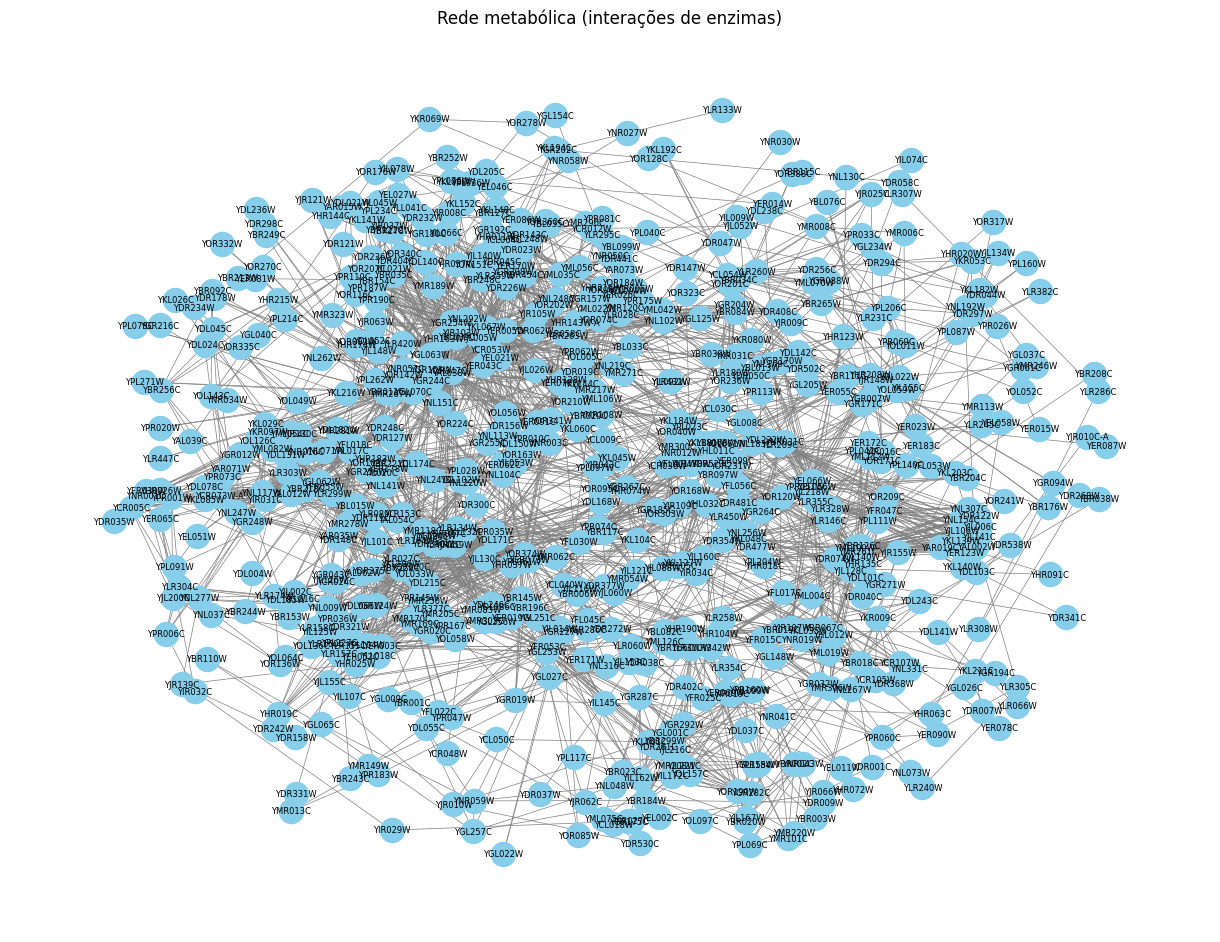

In [7]:
import matplotlib.pyplot as plt

# Configurar plot com zoom
plt.figure(figsize=(12, 9))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Ajuste 'k' para espaçamento

nx.draw(G, pos, with_labels=True,
        node_size=300,
        font_size=6,
        node_color='skyblue',
        edge_color='gray',
        width=0.5)

plt.title("Rede metabólica (interações de enzimas)")
plt.show()

## 4. Matriz de features

In [8]:
import pandas as pd

with open('var_names.txt', 'r') as f:
    colunas = f.read().splitlines()

# Carregar valores - ajuste o delimiter conforme necessário
valores = np.loadtxt('X.txt', delimiter=',')

# Criar DataFrame
matriz_features = pd.DataFrame(valores, columns=colunas)

with pd.option_context('display.max_columns', None):
    display(matriz_features)

,CELL-CELL-CYCLE-ALPHA-FACTOR-1,CELL-CYCLE-ALPHA-FACTOR-2,CELL-CYCLE-ALPHA-FACTOR-3,CELL-CYCLE-ALPHA-FACTOR-4,CELL-CYCLE-ALPHA-FACTOR-5,CELL-CYCLE-ALPHA-FACTOR-6,CELL-CYCLE-ALPHA-FACTOR-7,CELL-CYCLE-ALPHA-FACTOR-8,CELL-CYCLE-ALPHA-FACTOR-9,CELL-CYCLE-ALPHA-FACTOR-10,CELL-CYCLE-ALPHA-FACTOR-11,CELL-CYCLE-ALPHA-FACTOR-12,CELL-CYCLE-ALPHA-FACTOR-13,CELL-CYCLE-ALPHA-FACTOR-14,CELL-CYCLE-ALPHA-FACTOR-15,CELL-CYCLE-ALPHA-FACTOR-16,CELL-CYCLE-ALPHA-FACTOR-17,CELL-CYCLE-ALPHA-FACTOR-18,CELL-CYCLE-CDC15-10M,CELL-CYCLE-CDC15-30M,CELL-CYCLE-CDC15-50M,CELL-CYCLE-CDC15-70M,CELL-CYCLE-CDC15-80M,CELL-CYCLE-CDC15-90M,CELL-CYCLE-CDC15-100M,CELL-CYCLE-CDC15-110M,CELL-CYCLE-CDC15-120M,CELL-CYCLE-CDC15-120M,CELL-CYCLE-CDC15-130M,CELL-CYCLE-CDC15-140M,CELL-CYCLE-CDC15-150M,CELL-CYCLE-CDC15-160M,CELL-CYCLE-CDC15-160M,CELL-CYCLE-CDC15-170M,CELL-CYCLE-CDC15-180M,CELL-CYCLE-CDC15-190M,CELL-CYCLE-CDC15-200M,CELL-CYCLE-CDC15-210M,CELL-CYCLE-CDC15-220M,CELL-CYCLE-CDC15-240M,CELL-CYCLE-CDC15-250M,CELL-CYCLE-CDC15-270M,CELL-CYCLE-CDC15-290M,CELL-CYCLE-ELUTRIATION-0.0HRS,CELL-CYCLE-ELUTRIATION-0.5HRS,CELL-CYCLE-ELUTRIATION-1.0HRS,CELL-CYCLE-ELUTRIATION-1.5HRS,CELL-CYCLE-ELUTRIATION-2.0HRS,CELL-CYCLE-ELUTRIATION-2.5HRS,CELL-CYCLE-ELUTRIATION-3.0HRS,CELL-CYCLE-ELUTRIATION-3.5HRS,CELL-CYCLE-ELUTRIATION-4.0HRS,CELL-CYCLE-ELUTRIATION-4.5HRS,CELL-CYCLE-ELUTRIATION-5.0HRS,CELL-CYCLE-ELUTRIATION-5.5HRS,CELL-CYCLE-ELUTRIATION-6.0HRS,CELL-CYCLE-ELUTRIATION-6.5HRS,CELL-CYCLE-CLN3-INDUCTION-30M,CELL-CYCLE-CLN3-INDUCTION-40M,CELL-CYCLE-CLB5-INDUCTION-40M,SPORULATION-0,SPORULATION-30M,SPORULATION-2H,SPORULATION-5H,SPORULATION-7H,SPORULATION-9H,SPORULATION-11H,SPORULATION-2H-,SPORULATION-7H-,SPORULATION-11H-,SPORULATION-NDT80--EARLY,SPORULATION-NDT80--MIDDLE,SPORULATION-NDT80OVER,DIAUXIC-SHIFT-19.0G/L,DIAUXIC-SHIFT-18.7G/L,DIAUXIC-SHIFT-17.6G/L,DIAUXIC-SHIFT-14.0G/L,DIAUXIC-SHIFT-7.5G/L,DIAUXIC-SHIFT-0.2G/L,DIAUXIC-SHIFT-0G/L,CLN3-1,CLN3-2,CLB2-2,CLB2-1,ALPHA0,ALPHA7,ALPHA14,ALPHA21,ALPHA28,ALPHA35,ALPHA42,ALPHA49,ALPHA56,ALPHA63,ALPHA70,ALPHA77,ALPHA84,ALPHA91,ALPHA98,ALPHA105,ALPHA112,ALPHA119,CDC15_10,CDC15_30,CDC15_50,CDC15_70,CDC15_80,CDC15_90,CDC15_100,CDC15_110,CDC15_120,CDC15_130,CDC15_140,CDC15_150,CDC15_160,CDC15_170,CDC15_180,CDC15_190,CDC15_200,CDC15_210,CDC15_220,CDC15_230,CDC15_240,CDC15_250,CDC15_270,CDC15_290,CDC28_0,CDC28_10,CDC28_20,CDC28_30,CDC28_40,CDC28_50,CDC28_60,CDC28_70,CDC28_80,CDC28_90,CDC28_100,CDC28_110,CDC28_120,CDC28_130,CDC28_140,CDC28_150,CDC28_160,ELU0,ELU30,ELU60,ELU90,ELU120,ELU150,ELU180,ELU210,ELU240,ELU270,ELU300,ELU330,ELU360,ELU390,AMBIGUOUS,MITOCHONDRION,VACUOLE,SPINDLE_POLE,CELL_PERIPHERY,PUNCTATE_COMPOSITE,VACUOLAR_MEMBRANE,ER,NUCLEAR_PERIPHERY,ENDOSOME,BUD_NECK,MICROTUBULE,GOLGI,LATE_GOLGI,PEROXISOME,ACTIN 1 NO,NUCLEOLUS,CYTOPLASM,ER_TO_GOLGI,EARLY_GOLGI,LIPID_PARTICLE,NUCLEUS,BUD,PHY-AAE,PHY-AFU,PHY-ANA,PHY-APE,PHY-ATC,PHY-ATH,PHY-ATU,PHY-BAB,PHY-BAN,PHY-BAS,PHY-BBU,PHY-BCE,PHY-BFL,PHY-BHA,PHY-BJA,PHY-BLO,PHY-BME,PHY-BMS,PHY-BSU,PHY-BTH,PHY-BUC,PHY-CAC,PHY-CBU,PHY-CCA,PHY-CCR,PHY-CEF,PHY-CEL,PHY-CGL,PHY-CJE,PHY-CMU,PHY-CPA,PHY-CPE,PHY-CPJ,PHY-CPN,PHY-CPT,PHY-CTC,PHY-CTE,PHY-CTR,PHY-DME,PHY-DRA,PHY-DRE,PHY-ECC,PHY-ECE,PHY-ECJ,PHY-ECO,PHY-ECS,PHY-ECU,PHY-EFA,PHY-FNU,PHY-HAL,PHY-HDU,PHY-HHE,PHY-HIN,PHY-HPJ,PHY-HPY,PHY-HSA,PHY-LIL,PHY-LIN,PHY-LLA,PHY-LMO,PHY-LPL,PHY-MAC,PHY-MBO,PHY-MGA,PHY-MGE,PHY-MJA,PHY-MKA,PHY-MLE,PHY-MLO,PHY-MMA,PHY-MMU,PHY-MPE,PHY-MPN,PHY-MPU,PHY-MTC,PHY-MTH,PHY-MTU,PHY-NEU,PHY-NMA,PHY-NME,PHY-OIH,PHY-PAB,PHY-PAE,PHY-PAI,PHY-PFA,PHY-PFU,PHY-PHO,PHY-PMA,PHY-PMM,PHY-PMT,PHY-PMU,PHY-PPU,PHY-PST,PHY-RBA,PHY-RCO,PHY-RNO,PHY-RPR,PHY-RSO,PHY-SAG,PHY-SAM,PHY-SAN,PHY-SAU,PHY-SAV,PHY-SCE,PHY-SCO,PHY-SEP,PHY-SFL,PHY-SFX,PHY-SMA,PHY-SME,PHY-SMU,PHY-SON,PHY-SPG,PHY-SPM,PHY-SPN,PHY-SPO,PHY-SPR,PHY-SPS,PHY-SPY,PHY-SSO,PHY-STM,PHY-STO,PHY-STT,PHY-STY,PHY-SYN,PHY-SYW,PHY-TAC,PHY-TEL,PHY-TMA,PHY-TPA,PHY-TTE,PHY-TVO,PHY-TWH,PHY-TWS,PHY-UUR,PHY-VCH,PHY-VPA,PHY-VVU,PHY-WBR,PHY-XAC,PHY-XCC,PHY-XFA,PHY-XFT,PHY-YPE,PHY-YPK
0,-0.5943

## 5. Análise de Centralidade

A análise de centralidade ajuda a identificar os nós (enzimas) mais importantes ou influentes na rede metabólica. Diferentes medidas de centralidade capturam diferentes aspectos de importância. Vamos calcular e analisar algumas das principais medidas de centralidade.

Lembre-se que o grafo `G` já foi criado e os nomes dos nós já foram atribuídos nas células anteriores.

In [9]:
# 4.1 Centralidade de Grau (Degree Centrality)
# Mede o número de conexões que um nó possui.

degree_centrality = nx.degree_centrality(G)
#print("Centralidade de Grau:", degree_centrality)

# Top 5 nós com maior centralidade de grau
top_n = 5
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
print(f"Top {top_n} enzimas por Centralidade de Grau:")
for i in range(min(top_n, len(sorted_degree_centrality))):
    print(f"{sorted_degree_centrality[i][0]}: {sorted_degree_centrality[i][1]:.4f}")

# Visualização (opcional, pode ser complexa para grafos grandes)
# plt.figure(figsize=(15, 10))
# pos = nx.spring_layout(G, k=0.3, iterations=30) # Recalcular pos para melhor visualização se necessário
# node_sizes_degree = [v * 10000 for v in degree_centrality.values()] # Escalar para visualização
# nx.draw(G, pos, with_labels=True, node_size=node_sizes_degree, font_size=8, node_color='lightblue', edge_color='gray')
# plt.title('Rede Metabólica - Tamanho do Nó por Centralidade de Grau')
# plt.show()

Top 5 enzimas por Centralidade de Grau:
YER005W: 0.1124
YAL038W: 0.1079
YOR347C: 0.1079
YKL067W: 0.0825
YKL106W: 0.0660


In [10]:
# 4.2 Centralidade de Intermediação (Betweenness Centrality)
# Mede a frequência com que um nó aparece nos caminhos mais curtos entre outros pares de nós.

betweenness_centrality = nx.betweenness_centrality(G)
#print("Centralidade de Intermediação:", betweenness_centrality)

# Top 5 nós com maior centralidade de intermediação
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
print(f"Top {top_n} enzimas por Centralidade de Intermediação:")
for i in range(min(top_n, len(sorted_betweenness_centrality))):
    print(f"{sorted_betweenness_centrality[i][0]}: {sorted_betweenness_centrality[i][1]:.4f}")

Top 5 enzimas por Centralidade de Intermediação:
YHR104W: 0.1207
YER005W: 0.0930
YBR184W: 0.0812
YAL038W: 0.0644
YOR347C: 0.0644


In [11]:
# 4.3 Centralidade de Proximidade (Closeness Centrality)
# Mede a quão próximo um nó está de todos os outros nós na rede.

closeness_centrality = nx.closeness_centrality(G)
#print("Centralidade de Proximidade:", closeness_centrality)

# Top 5 nós com maior centralidade de proximidade
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
print(f"Top {top_n} enzimas por Centralidade de Proximidade:")
for i in range(min(top_n, len(sorted_closeness_centrality))):
    print(f"{sorted_closeness_centrality[i][0]}: {sorted_closeness_centrality[i][1]:.4f}")

Top 5 enzimas por Centralidade de Proximidade:
YER073W: 0.2412
YOR374W: 0.2412
YPL061W: 0.2412
YKL106W: 0.2400
YLR027C: 0.2400


In [12]:
# 4.4 Centralidade de Autovetor (Eigenvector Centrality)
# Mede a influência de um nó na rede. Nós conectados a nós altamente conectados têm maior centralidade de autovetor.

try:
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G) # Usar _numpy para melhor convergência em alguns casos
    #print("Centralidade de Autovetor:", eigenvector_centrality)

    # Top 5 nós com maior centralidade de autovetor
    sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
    print(f"Top {top_n} enzimas por Centralidade de Autovetor:")
    for i in range(min(top_n, len(sorted_eigenvector_centrality))):
        print(f"{sorted_eigenvector_centrality[i][0]}: {sorted_eigenvector_centrality[i][1]:.4f}")
except Exception as e:
    print(f"Não foi possível calcular a Centralidade de Autovetor: {e}")
    print("Isso pode ocorrer em grafos desconectados ou com certas estruturas.")
    eigenvector_centrality = {node: 0 for node in G.nodes()} # Placeholder se falhar


Top 5 enzimas por Centralidade de Autovetor:
YAL038W: 0.2901
YOR347C: 0.2901
YER005W: 0.2629
YKL067W: 0.2048
YJL005W: 0.1705


### 5.1. Interpretação dos Resultados da Centralidade

Ao analisar as diferentes medidas de centralidade, observe:
- **Nós consistentemente altos**: Enzimas que aparecem no topo de múltiplas listas de centralidade são provavelmente cruciais para a estrutura e função da rede.
- **Diferenças entre medidas**: Algumas enzimas podem ser altas em grau (muitas conexões diretas) mas baixas em intermediação (não são pontes críticas), ou vice-versa. Essas diferenças revelam papéis distintos.
- **Contexto Biológico**: Relacione as enzimas identificadas com suas funções biológicas conhecidas. A centralidade delas faz sentido no contexto das vias metabólicas?

Essa análise inicial de centralidade fornece uma lista de enzimas candidatas para investigação mais aprofundada sobre seu papel na rede metabólica.

## 6. Detecção de Comunidades

A detecção de comunidades visa encontrar grupos de nós (enzimas) que são mais densamente conectados entre si do que com o resto da rede. Em redes metabólicas, essas comunidades frequentemente correspondem a módulos funcionais ou vias metabólicas.

Usaremos o algoritmo de Louvain, que é eficiente e popular para esta tarefa.
**Nota:** Certifique-se de que a biblioteca `python-louvain` está instalada (`pip install python-louvain`). A importação correta é `import community.community_louvain as community_louvain_alg`.

In [14]:
pip install python-louvain

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9460 sha256=d1b68d826310cd60e2baec7df9ef29afb653d072058eb57aed9bc860d058247a
  Stored in directory: /home/codespace/.cache/pip/wheels/40/f1/e3/485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


Número de comunidades detectadas: 23


/tmp/ipykernel_8922/1512060564.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


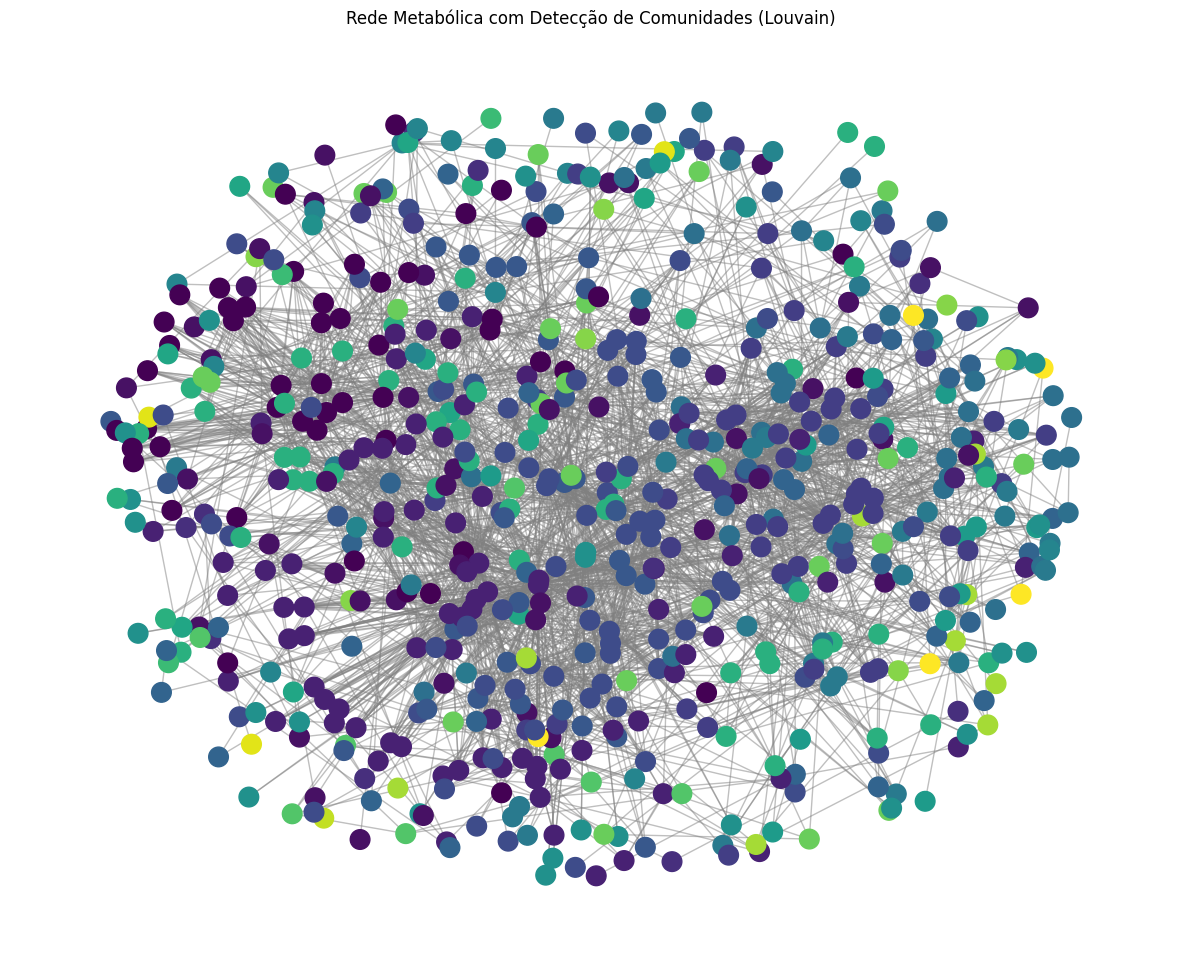

Modularidade da partição: 0.7723


In [15]:
# 5.1 Detecção de Comunidades com o Algoritmo de Louvain
# Certifique-se de ter instalado: pip install python-louvain
import community.community_louvain as community_louvain_alg
import matplotlib.cm as cm
import networkx as nx # Explicit import for safety
import matplotlib.pyplot as plt # Explicit import for safety

# Assumindo que G já foi definido e carregado anteriormente no notebook.
# Exemplo: G = seu_grafo_networkx

# Detectar comunidades
# O grafo G deve ser não direcionado para o algoritmo de Louvain como implementado em python-louvain
# Se G for direcionado, converta-o para não direcionado para esta análise específica ou use um algoritmo que suporte grafos direcionados.
if 'G' not in globals():
    print("Erro: Grafo G não definido. Por favor, carregue seu grafo primeiro.")
else:
    if nx.is_directed(G):
        print("O grafo G é direcionado. Convertendo para não direcionado para a detecção de comunidades com Louvain.")
        G_undirected = G.to_undirected()
    else:
        G_undirected = G

    partition = community_louvain_alg.best_partition(G_undirected)

    # Imprimir o número de comunidades encontradas
    num_communities = len(set(partition.values()))
    print(f"Número de comunidades detectadas: {num_communities}")

    # Mostrar algumas comunidades e seus membros (exemplo)
    # community_nodes = {}
    # for node, comm_id in partition.items():
    #     if comm_id not in community_nodes:
    #         community_nodes[comm_id] = []
    #     community_nodes[comm_id].append(node)
    # for i in range(min(3, num_communities)): # Mostrar as 3 primeiras comunidades
    #     print(f"Comunidade {i}: {community_nodes[i][:10]}... (mostrando até 10 membros)")

    # 5.2 Visualização das Comunidades
    # A visualização pode ser desafiadora para grafos grandes.
    # Aqui, tentamos colorir os nós de acordo com suas comunidades.

    plt.figure(figsize=(15, 12))
    # Usar o mesmo layout ou recalcular. Se G_undirected for muito grande, spring_layout pode ser lento.
    # Considere alternativas como nx.kamada_kawai_layout(G_undirected) ou nx.random_layout(G_undirected)
    # ou mesmo plotar apenas uma sub-amostra ou um componente principal.
    if G_undirected.number_of_nodes() < 1000: # Evitar layouts muito demorados para grafos grandes
        pos = nx.spring_layout(G_undirected, k=0.3, iterations=30)
    else:
        pos = nx.random_layout(G_undirected) # Fallback para grafos maiores

    # Gerar cores para as comunidades
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

    nx.draw_networkx_nodes(G_undirected, pos, partition.keys(), node_size=200,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G_undirected, pos, alpha=0.5, edge_color='gray')
    # nx.draw_networkx_labels(G_undirected, pos, font_size=6) # Adicionar labels pode poluir

    plt.title("Rede Metabólica com Detecção de Comunidades (Louvain)")
    plt.axis('off') # Desligar os eixos
    plt.show()

    # Calcular e imprimir a modularidade
    modularity = community_louvain_alg.modularity(partition, G_undirected)
    print(f"Modularidade da partição: {modularity:.4f}")


### 6.1. Interpretação dos Resultados da Detecção de Comunidades

- **Número e Tamanho das Comunidades**: Quantas comunidades foram encontradas? Elas são de tamanhos variados ou mais uniformes? Muitas comunidades pequenas podem indicar uma estrutura fragmentada, enquanto poucas comunidades grandes podem indicar módulos funcionais mais amplos.
- **Modularidade**: A modularidade é uma medida da força da divisão da rede em módulos. Valores mais altos (tipicamente > 0.3) indicam uma boa divisão em comunidades.
- **Análise Funcional (Passo Avançado)**: Para uma interpretação biológica mais profunda, você pode analisar as enzimas dentro de cada comunidade. Elas compartilham funções conhecidas ou participam das mesmas vias metabólicas? Ferramentas de enriquecimento funcional (e.g., usando ontologias gênicas como GO, ou bancos de dados de vias como KEGG) podem ser usadas aqui para identificar se certas funções ou vias são sobrerrepresentadas em comunidades específicas.

## 7. Análise de Propriedades da Rede

A análise das propriedades globais da rede fornece insights sobre a arquitetura geral e as características da nossa rede metabólica. Essas métricas ajudam a entender quão conectada a rede é, se ela exibe propriedades de mundo pequeno ou livre de escala, e como ela se compara a outros tipos de redes.

Para algumas métricas, como o comprimento médio do caminho mais curto, é importante considerar se o grafo é conectado. Se não for, analisaremos o maior componente conectado (LCC - Largest Connected Component). O grafo `G_undirected` foi criado na seção de detecção de comunidades e será usado aqui se aplicável.

In [16]:
# 6.1 Número de Nós e Arestas, Densidade e Grau Médio

# Relembrando o número de nós e arestas (usando G_undirected se as análises subsequentes o utilizarem)
# Se G_undirected não foi definido na célula anterior (ex: se o grafo original já era não direcionado)
# certifique-se de que G_undirected está disponível ou use G.
# Para consistência com a detecção de comunidades, vamos assumir G_undirected.

if 'G_undirected' not in globals() or G_undirected is None:
    if nx.is_directed(G):
        print("Criando G_undirected a partir de G para análise de propriedades.")
        G_undirected = G.to_undirected()
    else:
        G_undirected = G

num_nodes = G_undirected.number_of_nodes()
num_edges = G_undirected.number_of_edges()
print(f"Número de nós (enzimas): {num_nodes}")
print(f"Número de arestas (interações): {num_edges}")

# Densidade da rede
density = nx.density(G_undirected)
print(f"Densidade da rede: {density:.4f}")

# Grau médio
if num_nodes > 0:
    avg_degree = 2 * num_edges / num_nodes
    print(f"Grau médio: {avg_degree:.4f}")
else:
    print("Grau médio: N/A (grafo sem nós)")


Número de nós (enzimas): 668
Número de arestas (interações): 2782
Densidade da rede: 0.0125
Grau médio: 8.3293


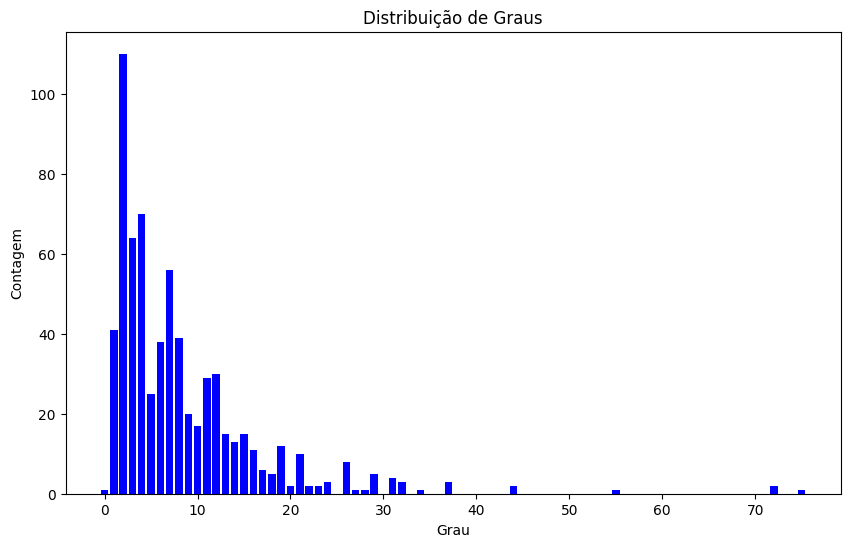

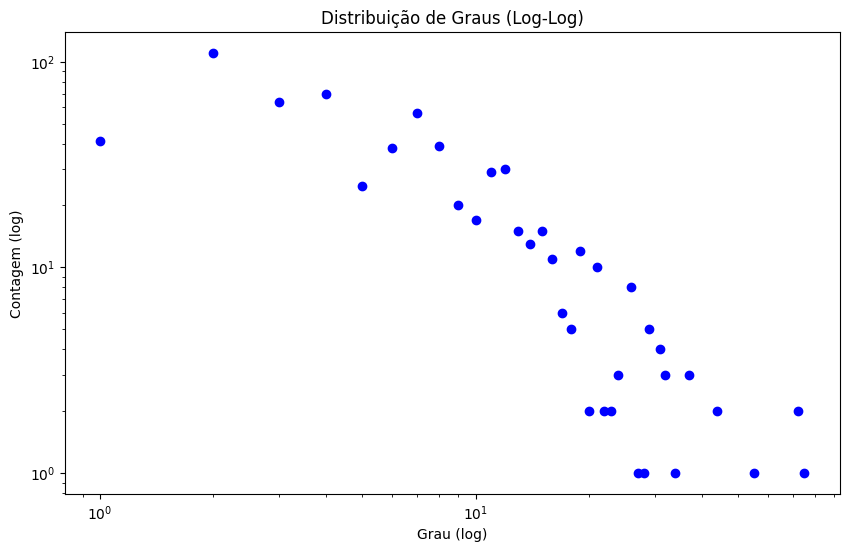

In [17]:
# 6.2 Distribuição de Graus

import matplotlib.pyplot as plt
import collections

degrees = [G_undirected.degree(n) for n in G_undirected.nodes()]
degree_counts = collections.Counter(degrees)
deg, cnt = zip(*degree_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Distribuição de Graus")
plt.ylabel("Contagem")
plt.xlabel("Grau")
plt.show()

# Plot em escala log-log para verificar propriedade de rede livre de escala
plt.figure(figsize=(10, 6))
plt.loglog(deg, cnt, marker='o', linestyle='none', color='b')
plt.title("Distribuição de Graus (Log-Log)")
plt.ylabel("Contagem (log)")
plt.xlabel("Grau (log)")
plt.show()


In [18]:
# 6.3 Comprimento Médio do Caminho Mais Curto e Componentes Conectados

# Verificar se o grafo é conectado
is_connected = nx.is_connected(G_undirected)
print(f"O grafo é conectado? {is_connected}")

if is_connected:
    avg_shortest_path = nx.average_shortest_path_length(G_undirected)
    print(f"Comprimento médio do caminho mais curto: {avg_shortest_path:.4f}")
else:
    print("O grafo não é conectado. Analisando o maior componente conectado (LCC).")
    # Encontrar todos os componentes conectados
    connected_components = list(nx.connected_components(G_undirected))
    print(f"Número de componentes conectados: {len(connected_components)}")

    if connected_components:
        # Encontrar o maior componente conectado (LCC)
        lcc_nodes = max(connected_components, key=len)
        LCC = G_undirected.subgraph(lcc_nodes)
        print(f"Número de nós no LCC: {LCC.number_of_nodes()}")
        print(f"Número de arestas no LCC: {LCC.number_of_edges()}")

        # Calcular o comprimento médio do caminho mais curto para o LCC
        if LCC.number_of_nodes() > 1: # Precisa de pelo menos 2 nós para ter caminhos
            avg_shortest_path_lcc = nx.average_shortest_path_length(LCC)
            print(f"Comprimento médio do caminho mais curto no LCC: {avg_shortest_path_lcc:.4f}")
        else:
            print("LCC tem 1 nó ou menos, não é possível calcular o comprimento médio do caminho.")
    else:
        print("Nenhum componente conectado encontrado.")


O grafo é conectado? False
O grafo não é conectado. Analisando o maior componente conectado (LCC).
Número de componentes conectados: 7
Número de nós no LCC: 621
Número de arestas no LCC: 2714
Comprimento médio do caminho mais curto no LCC: 5.7190


In [19]:
# 6.4 Coeficiente de Aglomeração Médio

# O coeficiente de aglomeração pode ser calculado para G_undirected
avg_clustering = nx.average_clustering(G_undirected)
print(f"Coeficiente de aglomeração médio: {avg_clustering:.4f}")

# Você também pode querer ver o coeficiente de aglomeração para cada nó
# clustering_coeffs = nx.clustering(G_undirected)
# print("Primeiros 5 coeficientes de aglomeração por nó:", dict(list(clustering_coeffs.items())[:5]))


Coeficiente de aglomeração médio: 0.3362


### 7.1. Interpretação das Propriedades da Rede

- **Densidade**: Redes metabólicas são tipicamente esparsas (baixa densidade), indicando que apenas uma pequena fração das possíveis interações enzimáticas realmente ocorre.
- **Distribuição de Graus**: Se a distribuição de graus em escala log-log se assemelhar a uma reta, isso sugere uma rede livre de escala. Tais redes possuem hubs (nós com grau muito alto) e são robustas a falhas aleatórias, mas vulneráveis a ataques direcionados a esses hubs.
- **Comprimento Médio do Caminho Mais Curto e Coeficiente de Aglomeração**: Um baixo comprimento médio do caminho mais curto e um alto coeficiente de aglomeração são características de redes de "mundo pequeno". Isso implica que a rede é eficiente para a transferência de informação/fluxo metabólico e que existem módulos locais densamente conectados.
- **Componentes Conectados**: Se a rede não for totalmente conectada, a análise do LCC é crucial, pois representa a maior parte funcionalmente coesa da rede. Outros componentes menores podem representar vias periféricas ou artefatos de dados.

## 8. Análise de Robustez

A análise de robustez examina quão bem a rede mantém sua integridade estrutural ou funcional quando submetida a perturbações, como a remoção de nós (enzimas). Isso é crucial para entender a estabilidade e resiliência do sistema metabólico.

Vamos simular dois cenários:
1.  **Ataque Direcionado**: Remoção de nós com base em sua importância (e.g., maior grau).
2.  **Falha Aleatória**: Remoção aleatória de nós.

Mediremos o impacto observando o tamanho do Maior Componente Conectado (LCC) da rede. Usaremos `G_undirected` que foi preparado nas seções anteriores.

In [20]:
import random

Simulações de robustez concluídas.


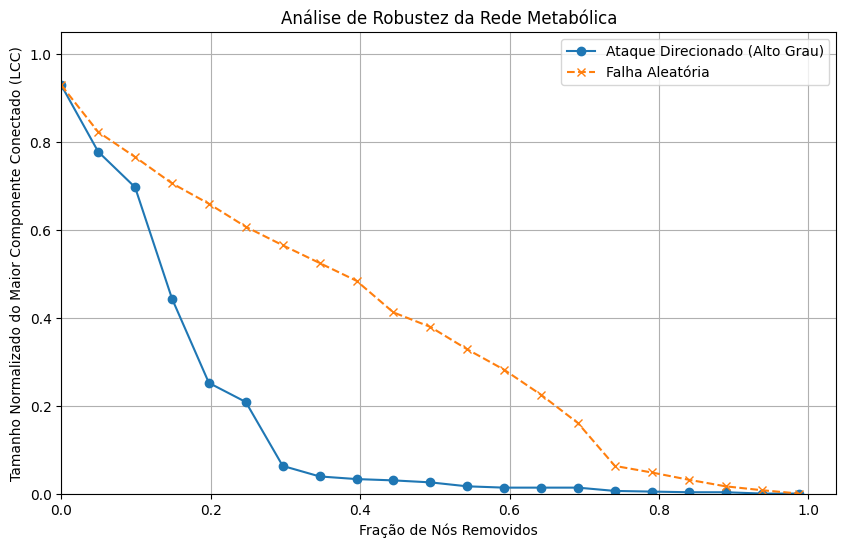

In [21]:
# 7.1 Simulação de Remoção de Nós e Cálculo da Robustez

# Função para calcular o tamanho do LCC após remover nós
def get_lcc_size(graph):
    if not graph.nodes():
        return 0
    if not nx.is_connected(graph):
        connected_components = list(nx.connected_components(graph))
        if not connected_components:
            return 0
        lcc_nodes = max(connected_components, key=len)
        return len(lcc_nodes)
    return graph.number_of_nodes()

# Assegurar que G_undirected existe e está definido
if 'G_undirected' not in globals() or G_undirected is None:
    if nx.is_directed(G):
        print("Criando G_undirected a partir de G para análise de robustez.")
        G_undirected = G.to_undirected()
    else:
        G_undirected = G

original_num_nodes = G_undirected.number_of_nodes()
if original_num_nodes == 0:
    print("Grafo original não tem nós. Análise de robustez não aplicável.")
else:
    # --- Ataque Direcionado (removendo nós de maior grau primeiro) ---
    G_targeted = G_undirected.copy()
    degrees_targeted = dict(G_targeted.degree())
    # Ordenar nós por grau decrescente
    nodes_sorted_by_degree = sorted(degrees_targeted, key=degrees_targeted.get, reverse=True)

    targeted_lcc_sizes = [get_lcc_size(G_targeted)] # LCC size before any removal
    # Definir a fração de nós a serem removidos em cada passo
    # Por exemplo, remover de 1% a 50% dos nós, em passos de 1% ou 5%
    # Para uma análise mais rápida, podemos usar passos maiores ou um limite menor
    #fractions_to_remove = [i/100 for i in range(1, 51, 5)] # Remover até 50% em passos de 5%
    num_steps = 20 # Número de pontos na curva de robustez
    nodes_to_remove_per_step = original_num_nodes // num_steps
    if nodes_to_remove_per_step == 0: nodes_to_remove_per_step = 1 # remover pelo menos 1

    removed_counts_targeted = [0]
    current_removed_count_targeted = 0

    for i in range(num_steps):
        nodes_to_remove_this_step = nodes_sorted_by_degree[current_removed_count_targeted : current_removed_count_targeted + nodes_to_remove_per_step]
        if not nodes_to_remove_this_step: break # Não há mais nós para remover
        G_targeted.remove_nodes_from(nodes_to_remove_this_step)
        targeted_lcc_sizes.append(get_lcc_size(G_targeted))
        current_removed_count_targeted += len(nodes_to_remove_this_step)
        removed_counts_targeted.append(current_removed_count_targeted)
        if not G_targeted.nodes(): break # Grafo ficou vazio

    # Normalizar o tamanho do LCC pelo número original de nós
    targeted_lcc_sizes_normalized = [s / original_num_nodes for s in targeted_lcc_sizes]
    removed_fractions_targeted = [c / original_num_nodes for c in removed_counts_targeted]

    # --- Falha Aleatória ---
    # Para obter uma curva mais suave, podemos repetir a remoção aleatória várias vezes e tirar a média
    # Aqui, para simplificar, faremos uma única execução.
    G_random = G_undirected.copy()
    nodes_random_order = list(G_random.nodes())
    random.shuffle(nodes_random_order)

    random_lcc_sizes = [get_lcc_size(G_random)]
    removed_counts_random = [0]
    current_removed_count_random = 0

    for i in range(num_steps):
        nodes_to_remove_this_step = nodes_random_order[current_removed_count_random : current_removed_count_random + nodes_to_remove_per_step]
        if not nodes_to_remove_this_step: break
        G_random.remove_nodes_from(nodes_to_remove_this_step)
        random_lcc_sizes.append(get_lcc_size(G_random))
        current_removed_count_random += len(nodes_to_remove_this_step)
        removed_counts_random.append(current_removed_count_random)
        if not G_random.nodes(): break

    random_lcc_sizes_normalized = [s / original_num_nodes for s in random_lcc_sizes]
    removed_fractions_random = [c / original_num_nodes for c in removed_counts_random]

    print("Simulações de robustez concluídas.")

    # 7.2 Plotar Curvas de Robustez
    plt.figure(figsize=(10, 6))
    plt.plot(removed_fractions_targeted, targeted_lcc_sizes_normalized, marker='o', linestyle='-', label='Ataque Direcionado (Alto Grau)')
    plt.plot(removed_fractions_random, random_lcc_sizes_normalized, marker='x', linestyle='--', label='Falha Aleatória')
    plt.title('Análise de Robustez da Rede Metabólica')
    plt.xlabel('Fração de Nós Removidos')
    plt.ylabel('Tamanho Normalizado do Maior Componente Conectado (LCC)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1.05) # Eixo Y de 0 a 1
    plt.xlim(0, max(removed_fractions_targeted[-1], removed_fractions_random[-1] if removed_fractions_random else 0) * 1.05) # Ajustar limite X
    plt.show()


### 8.1. Interpretação dos Resultados da Análise de Robustez

- **Comparação das Curvas**: Observe a diferença entre a curva de ataque direcionado e a de falha aleatória.
    - Se a rede for significativamente mais afetada por ataques direcionados (a curva do LCC cai mais rapidamente) do que por falhas aleatórias, isso é típico de redes livres de escala (scale-free). Tais redes são robustas a falhas aleatórias, mas vulneráveis à remoção de seus hubs (nós altamente conectados).
    - Se as curvas forem semelhantes, a rede pode não ter uma estrutura hierárquica forte ou hubs proeminentes.
- **Ponto Crítico**: Existe uma fração de nós removidos onde o LCC se desintegra rapidamente? Isso pode indicar um limiar de percolação ou um ponto de vulnerabilidade crítica da rede.
- **Contexto Biológico**: As enzimas cuja remoção (nos ataques direcionados) causa o maior impacto são conhecidas por serem essenciais ou por participarem de vias metabólicas centrais? Isso pode ajudar a identificar vulnerabilidades no sistema metabólico.

Esta análise fornece uma visão sobre a estabilidade estrutural da rede metabólica frente a diferentes tipos de perturbações.

## 9. Verificação de Dados Faltantes (Missing Values) na Matriz de Features (X.txt)

Antes de prosseguir com tarefas de machine learning, como a previsão de links, é fundamental verificar se a matriz de features (`X.txt`) contém dados faltantes (e.g., NaN - Not a Number). A maioria dos algoritmos não lida bem com valores ausentes, e a presença deles pode exigir uma etapa de **imputação de dados**.

Vamos carregar `X.txt` e verificar se existem valores NaN na matriz.


In [22]:
import numpy as np

# Carregar a matriz de features X.txt
try:
    # Assuming X.txt is in the same directory as the notebook
    X = np.loadtxt('X.txt', delimiter=',')
    print(f"Matriz de features X carregada com shape: {X.shape}")
except Exception as e:
    print(f"Erro ao carregar X.txt: {e}")
    X = None # Indicar falha no carregamento

# Verificar a presença de NaNs se o carregamento foi bem-sucedido
if X is not None:
    num_nan = np.isnan(X).sum()

    if num_nan == 0:
        print("Não foram encontrados valores NaN na matriz de features X.")
        # Definir uma flag para indicar que não há NaNs
        missing_values_present = False
    else:
        print(f"ATENÇÃO: Foram encontrados {num_nan} valores NaN na matriz de features X.")
        # Calcular a porcentagem de valores NaN
        total_elements = X.size
        percentage_nan = (num_nan / total_elements) * 100
        print(f"Isso representa {percentage_nan:.4f}% do total de elementos na matriz.")
        print("Será necessário aplicar alguma técnica de imputação de dados antes de usar X para modelagem.")
        # Definir uma flag para indicar que há NaNs
        missing_values_present = True
else:
    print("Não foi possível verificar dados faltantes pois a matriz X não foi carregada.")
    missing_values_present = None # Estado desconhecido


Matriz de features X carregada com shape: (668, 325)
Não foram encontrados valores NaN na matriz de features X.


### 1.1. Imputação de Dados Faltantes (se necessário)

Se a verificação anterior indicou a presença de valores NaN na matriz de features `X`, precisamos imputá-los antes de usar os dados para modelagem. A imputação substitui os valores ausentes por estimativas.

Uma estratégia comum e simples é a **imputação pela média**, onde cada valor ausente em uma coluna (feature) é substituído pela média dos valores observados naquela coluna.

Vamos aplicar a imputação pela média usando `SimpleImputer` do scikit-learn, caso dados faltantes tenham sido detectados.


In [23]:
from sklearn.impute import SimpleImputer
import numpy as np

# Verificar se a variável 'missing_values_present' existe e é True
if 'missing_values_present' in locals() and missing_values_present:
    print("Aplicando imputação pela média nos valores NaN em X...")
    # Criar o imputer (estratégia pode ser 'mean', 'median', 'most_frequent')
    imputer = SimpleImputer(missing_values='NaN', strategy='mean')

    # Ajustar o imputer aos dados e transformar X
    # Assume-se que X foi carregado na célula anterior
    if 'X' in locals() and X is not None:
        X_imputed = imputer.fit_transform(X)

        # Verificar se ainda existem NaNs após a imputação (sanity check)
        num_nan_after = np.isnan(X_imputed).sum()
        if num_nan_after == 0:
            print("Imputação concluída. Não há mais valores NaN.")
            print(f"Shape da matriz imputada X_imputed: {X_imputed.shape}")
        else:
            print(f"ATENÇÃO: {num_nan_after} valores NaN ainda presentes após a imputação. Verificar o processo.")
            X_imputed = None # Indicar falha
    else:
        print("Erro: Variável X não encontrada ou não carregada. Imputação não realizada.")
        X_imputed = None

elif 'missing_values_present' in locals() and not missing_values_present:
    print("Não foram encontrados valores faltantes. Nenhuma imputação necessária.")
    # Usar a matriz original
    if 'X' in locals() and X is not None:
        X_imputed = X
        print(f"Usando a matriz original X como X_imputed. Shape: {X_imputed.shape}")
    else:
        print("Erro: Variável X não encontrada ou não carregada.")
        X_imputed = None
else:
    print("Variável 'missing_values_present' não definida. Não é possível determinar se a imputação é necessária.")
    X_imputed = None # Estado incerto

# A variável X_imputed agora contém a matriz de features pronta para uso (ou None se algo deu errado)


Não foram encontrados valores faltantes. Nenhuma imputação necessária.
Usando a matriz original X como X_imputed. Shape: (668, 325)


## 2. Previsão de Links (Link Prediction)

Agora que temos a matriz de features `X_imputed` (sem dados faltantes), podemos usá-la para uma tarefa de previsão de links. O objetivo é prever se uma interação (link) existe entre dois nós (enzimas) com base em suas features.

Isso será configurado como um problema de classificação binária:
1.  **Exemplos Positivos**: Pares de nós que *têm* uma ligação observada na rede original (`Y.txt` ou grafo `G`).
2.  **Exemplos Negativos**: Pares de nós que *não têm* uma ligação observada na rede.

**Consideração sobre Weak Labels**: É crucial notar que os exemplos negativos são "fracos" (weak labels). A ausência de uma ligação observada não garante que a interação não exista; ela pode simplesmente não ter sido detectada ou registrada. Técnicas de weak supervision poderiam ser aplicadas aqui para modelar essa incerteza, mas para este exemplo inicial, trataremos os não-links observados como exemplos negativos, mantendo essa limitação em mente.

**Estratégia de Validação**: Para avaliar o modelo, vamos esconder uma parte das ligações conhecidas (exemplos positivos) e usá-las como conjunto de teste. O modelo será treinado com os links restantes e os exemplos negativos.


In [24]:
import networkx as nx
import numpy as np
import random
from sklearn.model_selection import train_test_split

# Certificar que G e X_imputed estão disponíveis
if 'G' not in globals() or G is None:
    print("Erro: Grafo G não definido. Execute as células anteriores.")
    # Tentar recriar G se possível (assumindo que matriz_adj e nomes_nos existem)
    if 'matriz_adj' in globals() and 'nomes_nos' in globals():
        print("Tentando recriar G...")
        G = nx.from_numpy_array(matriz_adj)
        mapping = {i: nome for i, nome in enumerate(nomes_nos)}
        G = nx.relabel_nodes(G, mapping)
        print("Grafo G recriado.")
    else:
        print("Não foi possível recriar G.")
        raise NameError("Grafo G não definido.")

if 'X_imputed' not in globals() or X_imputed is None:
    print("Erro: Matriz de features X_imputed não definida. Execute as células de verificação/imputação.")
    raise NameError("X_imputed não definida.")

# Mapeamento reverso: nome do nó -> índice original (para acessar X_imputed)
node_list = list(G.nodes())
node_to_index = {node: i for i, node in enumerate(node_list)}

# 1. Obter exemplos positivos (links existentes)
edges = list(G.edges())

# 2. Separar links conhecidos para treino e teste (esconder alguns links)
# Vamos esconder 20% dos links para teste
if len(edges) > 1:
    train_edges, test_edges = train_test_split(edges, test_size=0.2, random_state=42)
else:
    # Lidar com caso de poucos edges (pode não ser ideal para link prediction)
    train_edges = edges
    test_edges = []
    print("Aviso: Poucos links existentes para criar um conjunto de teste significativo.")

# Criar um grafo de treino removendo os links de teste
G_train = G.copy()
G_train.remove_edges_from(test_edges)

# 3. Gerar exemplos negativos (pares sem link)
# Importante: Gerar o mesmo número de exemplos negativos que positivos para balanceamento inicial
# E garantir que os exemplos negativos não estejam nem no treino nem no teste original
num_neg_samples = len(train_edges) + len(test_edges) # Total de links originais
non_edges = []

# Obter todos os nós como uma lista para amostragem eficiente
all_nodes = list(G.nodes())

while len(non_edges) < num_neg_samples:
    # Amostrar dois nós aleatórios
    u, v = random.sample(all_nodes, 2)
    # Verificar se o link NÃO existe no grafo ORIGINAL e ainda não foi adicionado
    if not G.has_edge(u, v) and (u, v) not in non_edges and (v, u) not in non_edges:
        non_edges.append((u, v))

# Dividir exemplos negativos para treino e teste (proporcionalmente aos positivos)
if len(non_edges) > 1 and len(edges) > 1:
    test_size_neg = len(test_edges) / len(edges) # Mesma proporção que os positivos
    train_non_edges, test_non_edges = train_test_split(non_edges, test_size=test_size_neg, random_state=42)
elif len(non_edges) > 0:
    train_non_edges = non_edges
    test_non_edges = []
else:
    train_non_edges = []
    test_non_edges = []
    print("Aviso: Não foi possível gerar exemplos negativos.")

print(f"Links de treino (positivos): {len(train_edges)}")
print(f"Não-links de treino (negativos): {len(train_non_edges)}")
print(f"Links de teste (positivos escondidos): {len(test_edges)}")
print(f"Não-links de teste (negativos): {len(test_non_edges)}")

# 4. Criar features para os links/não-links
# Usaremos a concatenação das features dos nós como exemplo simples
feature_dim = X_imputed.shape[1]

def get_link_features(u, v, X_matrix, node_map):
    try:
        u_idx, v_idx = node_map[u], node_map[v]
        # Exemplo: Concatenação
        # Outras opções: Média, Produto Hadamard (element-wise), Diferença Absoluta
        return np.concatenate((X_matrix[u_idx], X_matrix[v_idx]))
    except KeyError:
        print(f"Aviso: Nó {u} ou {v} não encontrado no mapeamento.")
        return None # Ou retornar um vetor de zeros/NaNs

# Criar datasets de treino e teste
X_train_links = []
y_train = []
X_test_links = []
y_test = []

# Treino
for u, v in train_edges:
    features = get_link_features(u, v, X_imputed, node_to_index)
    if features is not None:
        X_train_links.append(features)
        y_train.append(1) # Label positivo
for u, v in train_non_edges:
    features = get_link_features(u, v, X_imputed, node_to_index)
    if features is not None:
        X_train_links.append(features)
        y_train.append(0) # Label negativo (fraco)

# Teste
for u, v in test_edges:
    features = get_link_features(u, v, X_imputed, node_to_index)
    if features is not None:
        X_test_links.append(features)
        y_test.append(1) # Label positivo
for u, v in test_non_edges:
    features = get_link_features(u, v, X_imputed, node_to_index)
    if features is not None:
        X_test_links.append(features)
        y_test.append(0) # Label negativo (fraco)

# Converter para arrays numpy
X_train = np.array(X_train_links)
y_train = np.array(y_train)
X_test = np.array(X_test_links)
y_test = np.array(y_test)

print(f"Shape do dataset de treino (X_train): {X_train.shape}")
print(f"Shape do dataset de teste (X_test): {X_test.shape}")


Links de treino (positivos): 2225
Não-links de treino (negativos): 2225
Links de teste (positivos escondidos): 557
Não-links de teste (negativos): 557
Shape do dataset de treino (X_train): (4450, 650)
Shape do dataset de teste (X_test): (1114, 650)


### 2.2. Abordagem Weak Label: Regressão Logística com Pesos de Classe

Uma maneira simples de lidar com a potencial falta de confiabilidade das labels negativas (não-links) é usar pesos de classe durante o treinamento. A ideia é dar um peso maior aos exemplos positivos (links conhecidos, que são mais confiáveis) e/ou um peso menor aos exemplos negativos (não-links observados, que podem conter falsos negativos).

Scikit-learn permite fazer isso facilmente com o parâmetro `class_weight='balanced'`, que ajusta os pesos inversamente proporcionais às frequências das classes. Alternativamente, poderíamos definir pesos manualmente se tivéssemos uma estimativa da proporção de falsos negativos.

Vamos treinar uma Regressão Logística usando `class_weight='balanced'`.


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np # Ensure numpy is imported

# Re-escalar features (boa prática, embora já feito antes, garante independência da célula)
# Verificar se os dados de treino/teste existem
if (
    "X_train" not in locals()
    or "y_train" not in locals()
    or "X_test" not in locals()
    or "y_test" not in locals()
    or X_train.shape[0] == 0
    or X_test.shape[0] == 0
):
    print(
        "Dados de treino/teste (X_train, y_train, X_test, y_test) não encontrados ou vazios."
        " Execute as células de preparação de dados de previsão de links primeiro."
    )
else:
    print("Re-escalando features para Regressão Logística com pesos...")
    scaler_weighted = StandardScaler()
    X_train_scaled_w = scaler_weighted.fit_transform(X_train)
    X_test_scaled_w = scaler_weighted.transform(X_test)

    # Treinar o modelo de Regressão Logística com pesos balanceados
    # O modo 'balanced' usa os valores de y para ajustar automaticamente os pesos
    # de forma inversamente proporcional às frequências das classes: w_j = n_samples / (n_classes * n_samples_j)
    model_weighted = LogisticRegression(
        random_state=42, class_weight="balanced", max_iter=1000
    )
    print("Treinando o modelo de Regressão Logística com class_weight='balanced\'...")
    model_weighted.fit(X_train_scaled_w, y_train)
    print("Treinamento concluído.")

    # Fazer previsões no conjunto de teste
    y_pred_w = model_weighted.predict(X_test_scaled_w)
    y_pred_proba_w = model_weighted.predict_proba(X_test_scaled_w)[:, 1]

    # Avaliar o modelo
    accuracy_w = accuracy_score(y_test, y_pred_w)
    try:
        auc_w = roc_auc_score(y_test, y_pred_proba_w)
    except ValueError as e:
        print(f"Não foi possível calcular AUC: {e}")
        auc_w = float("nan")

    print(f"Acurácia (Pesos Balanceados): {accuracy_w:.4f}")
    print(f"AUC (Pesos Balanceados): {auc_w:.4f}")

    print("Relatório de Classificação (Pesos Balanceados):")
    print(
        classification_report(
            y_test,
            y_pred_w,
            target_names=["No Link (0)", "Link (1)"],
            zero_division=0,
        )
    )

    # Comparação (opcional, se as variáveis do baseline ainda existirem)
    if "accuracy" in locals() and "auc" in locals():
        print("Comparação com Baseline (sem pesos):")
        print(f"  Acurácia: Baseline={accuracy:.4f}, Com Pesos={accuracy_w:.4f}")
        print(f"  AUC:      Baseline={auc:.4f}, Com Pesos={auc_w:.4f}")
        print(
            "(Observe se houve melhora na detecção da classe minoritária - Link (1) - no relatório acima)"
        )



Re-escalando features para Regressão Logística com pesos...
Treinando o modelo de Regressão Logística com class_weight='balanced'...
Treinamento concluído.
Acurácia (Pesos Balanceados): 0.7388
AUC (Pesos Balanceados): 0.8000
Relatório de Classificação (Pesos Balanceados):
              precision    recall  f1-score   support

 No Link (0)       0.75      0.72      0.73       557
    Link (1)       0.73      0.76      0.74       557

    accuracy                           0.74      1114
   macro avg       0.74      0.74      0.74      1114
weighted avg       0.74      0.74      0.74      1114



### 2.3. Abordagem Weak Label: PU Learning (Positive-Unlabeled)

Outra abordagem para lidar com a incerteza das labels negativas é o PU Learning. Aqui, tratamos os links observados como exemplos positivos (P) e os não-links observados como um conjunto não-rotulado (U), que contém tanto verdadeiros negativos quanto falsos negativos (links existentes mas não observados).

Uma estratégia comum de PU Learning é a abordagem de duas etapas:
1.  **Identificar Negativos Confiáveis (RN - Reliable Negatives)**: Treinar um classificador inicial (ou usar outra heurística) para identificar exemplos no conjunto U que são muito provavelmente negativos.
2.  **Treinar Classificador Final**: Treinar um classificador padrão usando os exemplos P como positivos e os RN identificados como negativos.

Vamos implementar uma versão simples dessa abordagem.


In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

# --- PU Learning Implementation (Two-Step Approach) ---

# Verificar se os dados de treino/teste existem
if (
    "X_train" not in locals()
    or "y_train" not in locals()
    or "X_test" not in locals()
    or "y_test" not in locals()
    or X_train.shape[0] == 0
    or X_test.shape[0] == 0
):
    print(
        "Dados de treino/teste (X_train, y_train, X_test, y_test) não encontrados ou vazios."
        " Execute as células de preparação de dados de previsão de links primeiro."
    )
else:
    print("Iniciando implementação de PU Learning (Two-Step)...")

    # Separar Positivos (P) e Não-Rotulados (U) do conjunto de TREINO
    positive_indices_train = np.where(y_train == 1)[0]
    unlabeled_indices_train = np.where(y_train == 0)[0]

    X_train_p = X_train[positive_indices_train]
    X_train_u = X_train[unlabeled_indices_train]

    if X_train_p.shape[0] == 0 or X_train_u.shape[0] == 0:
        print("Não há exemplos positivos ou não-rotulados suficientes no treino para PU Learning.")
    else:
        print(f"Exemplos Positivos (P) no treino: {X_train_p.shape[0]}")
        print(f"Exemplos Não-Rotulados (U) no treino: {X_train_u.shape[0]}")

        # Escalar features (importante para os classificadores)
        scaler_pu1 = StandardScaler()
        X_train_p_scaled = scaler_pu1.fit_transform(X_train_p)
        X_train_u_scaled = scaler_pu1.transform(X_train_u) # Usar o mesmo scaler

        # --- Etapa 1: Identificar Negativos Confiáveis (RN) ---
        # Treinar um classificador em P vs U (tratando U como negativo temporariamente)
        # Usaremos Regressão Logística novamente para simplicidade
        print("Etapa 1: Treinando classificador inicial (P vs U) para identificar RN...")
        # Criar labels temporários: 1 para P, 0 para U
        X_step1 = np.vstack((X_train_p_scaled, X_train_u_scaled))
        y_step1 = np.concatenate((np.ones(len(X_train_p_scaled)), np.zeros(len(X_train_u_scaled))))

        model_step1 = LogisticRegression(random_state=42, class_weight="balanced", max_iter=1000)
        model_step1.fit(X_step1, y_step1)

        # Obter predições (probabilidades) para o conjunto U
        proba_u = model_step1.predict_proba(X_train_u_scaled)[:, 1] # Probabilidade de ser classe 1 (P)

        # Identificar RN: exemplos em U com baixa probabilidade de serem P
        # Definir um limiar (threshold) - isso pode exigir ajuste
        threshold = 0.1 # Exemplo: considerar U com prob < 0.1 como RN
        reliable_negative_indices = np.where(proba_u < threshold)[0]
        X_train_rn = X_train_u[reliable_negative_indices] # Usar dados NÃO escalados originais

        if X_train_rn.shape[0] == 0:
            print(f"Aviso: Nenhum Negativo Confiável (RN) identificado com threshold={threshold}. Tente ajustar o threshold ou a abordagem.")
            # Opcional: Parar ou usar uma estratégia alternativa
            X_train_rn = None # Indicar falha
        else:
            print(f"Identificados {X_train_rn.shape[0]} Negativos Confiáveis (RN) do conjunto U.")

        # --- Etapa 2: Treinar Classificador Final (P vs RN) ---
        if X_train_rn is not None:
            print("Etapa 2: Treinando classificador final (P vs RN)...")
            # Preparar dados para o classificador final
            X_train_final = np.vstack((X_train_p, X_train_rn))
            y_train_final = np.concatenate((np.ones(len(X_train_p)), np.zeros(len(X_train_rn))))

            # Escalar os dados finais de treino
            scaler_pu2 = StandardScaler()
            X_train_final_scaled = scaler_pu2.fit_transform(X_train_final)

            # Escalar o conjunto de TESTE usando o scaler final
            # Usar o X_test original (contém positivos e não-rotulados/negativos fracos)
            X_test_scaled_pu = scaler_pu2.transform(X_test)

            # Treinar o classificador final (e.g., Regressão Logística)
            model_final_pu = LogisticRegression(random_state=42, max_iter=1000) # Não usar class_weight aqui, pois temos P e RN
            model_final_pu.fit(X_train_final_scaled, y_train_final)
            print("Treinamento do classificador final concluído.")

            # Avaliar no conjunto de TESTE original (y_test contém 0s e 1s verdadeiros/escondidos)
            y_pred_pu = model_final_pu.predict(X_test_scaled_pu)
            y_pred_proba_pu = model_final_pu.predict_proba(X_test_scaled_pu)[:, 1]

            accuracy_pu = accuracy_score(y_test, y_pred_pu)
            try:
                auc_pu = roc_auc_score(y_test, y_pred_proba_pu)
            except ValueError as e:
                print(f"Não foi possível calcular AUC: {e}")
                auc_pu = float("nan")

            print(f"Acurácia (PU Learning): {accuracy_pu:.4f}")
            print(f"AUC (PU Learning): {auc_pu:.4f}")

            print("Relatório de Classificação (PU Learning):")
            print(
                classification_report(
                    y_test,
                    y_pred_pu,
                    target_names=["No Link (0)", "Link (1)"],
                    zero_division=0,
                )
            )

            # Comparação (opcional)
            if "accuracy" in locals() and "auc" in locals() and "accuracy_w" in locals() and "auc_w" in locals():
                print("Comparação com Métodos Anteriores:")
                print(f"  Acurácia: Baseline={accuracy:.4f}, Com Pesos={accuracy_w:.4f}, PU={accuracy_pu:.4f}")
                print(f"  AUC:      Baseline={auc:.4f}, Com Pesos={auc_w:.4f}, PU={auc_pu:.4f}")
        else:
            print("Não foi possível treinar o classificador final de PU Learning devido à falta de RNs.")


Iniciando implementação de PU Learning (Two-Step)...
Exemplos Positivos (P) no treino: 2225
Exemplos Não-Rotulados (U) no treino: 2225
Etapa 1: Treinando classificador inicial (P vs U) para identificar RN...
Identificados 640 Negativos Confiáveis (RN) do conjunto U.
Etapa 2: Treinando classificador final (P vs RN)...
Treinamento do classificador final concluído.
Acurácia (PU Learning): 0.6589
AUC (PU Learning): 0.7685
Relatório de Classificação (PU Learning):
              precision    recall  f1-score   support

 No Link (0)       0.87      0.37      0.52       557
    Link (1)       0.60      0.94      0.73       557

    accuracy                           0.66      1114
   macro avg       0.74      0.66      0.63      1114
weighted avg       0.74      0.66      0.63      1114



## Análise Adicional: Fatorização de Matrizes Não-Negativas (NMF) na Matriz de Adjacência

Como sugerido, vamos aplicar a Fatorização de Matrizes Não-Negativas (NMF) à matriz de adjacência (`Y.txt`, carregada como `matriz_adj`). NMF é uma técnica de redução de dimensionalidade e extração de features que decompõe uma matriz não-negativa (como uma matriz de adjacência) em duas matrizes não-negativas de menor dimensão, geralmente chamadas W e H.

**Y ≈ W * H**

Onde:
*   **Y**: A matriz original (nós x nós).
*   **W**: Matriz de features latentes dos nós (nós x k), onde k é o número de componentes (features latentes).
*   **H**: Matriz de coeficientes (k x nós).

As colunas de W podem ser interpretadas como "features latentes" ou "comunidades soft" às quais cada nó pertence, e as linhas de H indicam a contribuição de cada feature latente para a conectividade de cada nó.

Vamos aplicar NMF e salvar as matrizes W e H para análise posterior. Também calcularemos o erro de reconstrução.

**Nota**: O número de componentes `k` (ou `n_components`) é um hiperparâmetro importante. Um valor maior captura mais detalhes, mas pode levar a overfitting. Um valor menor força uma representação mais compacta. Começaremos com um valor padrão (e.g., 20) e você pode experimentar outros valores.


In [27]:
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
import os

# --- Garantir que matriz_adj está carregada ---
local_matriz_adj = None
matriz_loaded_successfully = False

# Try to use global first
if 'matriz_adj' in globals() and globals()['matriz_adj'] is not None:
    print("Tentando usar a variável global 'matriz_adj'.")
    if isinstance(globals()['matriz_adj'], np.ndarray):
        try:
            # Assign to local variable
            local_matriz_adj = globals()['matriz_adj']
            print(f"Usando 'matriz_adj' global existente com shape: {local_matriz_adj.shape}")
            matriz_loaded_successfully = True
        except Exception as e_global_assign:
             print(f"Erro inesperado ao usar 'matriz_adj' global: {e_global_assign}")
             local_matriz_adj = None
             matriz_loaded_successfully = False
    else:
        print("Aviso: 'matriz_adj' global existe mas não é um array numpy. Tentando converter.")
        try:
            local_matriz_adj = np.array(globals()['matriz_adj'])
            print(f"Convertido 'matriz_adj' global existente para numpy array para uso local com shape: {local_matriz_adj.shape}")
            matriz_loaded_successfully = True
        except Exception as convert_error:
            print(f"Falha ao converter 'matriz_adj' global: {convert_error}")
            local_matriz_adj = None
            matriz_loaded_successfully = False

# If not loaded from global, try loading from file
if not matriz_loaded_successfully:
    print("Variável global 'matriz_adj' não encontrada, inválida ou falhou na conversão. Carregando de Y.txt...")
    try:
        local_matriz_adj = np.loadtxt('Y.txt', delimiter=',')
        print(f"Matriz de adjacência Y carregada de arquivo para uso local com shape: {local_matriz_adj.shape}")
        matriz_loaded_successfully = True
    except Exception as load_error:
        print(f"Erro crítico ao carregar Y.txt: {load_error}")
        print("Não é possível continuar com NMF sem a matriz de adjacência.")
        local_matriz_adj = None
        matriz_loaded_successfully = False

# --- Agora, prosseguir com NMF usando a variável local 'local_matriz_adj' ---

nmf_W = None
nmf_H = None

# CRITICAL CHECK: Only proceed if loading was successful AND local_matriz_adj is not None
if matriz_loaded_successfully and local_matriz_adj is not None:
    # Verificar se a matriz é adequada para NMF (não-negativa)
    if np.any(local_matriz_adj < 0):
        print("\nAviso: A matriz de adjacência contém valores negativos. NMF requer dados não-negativos.")
        # Consider adding handling here if needed (e.g., abs(), clipping, error)

    # Definir o número de componentes (features latentes)
    n_components_nmf = 20 # Hiperparâmetro - pode ser ajustado

    print(f"\nAplicando NMF com {n_components_nmf} componentes...")

    # Inicializar e ajustar o modelo NMF
    model_nmf = NMF(n_components=n_components_nmf, init='random', random_state=42, max_iter=300, tol=1e-4)

    try:
        # W: Matriz de features latentes dos nós (n_samples x n_components)
        W = model_nmf.fit_transform(local_matriz_adj)
        # H: Matriz de componentes (n_components x n_features)
        H = model_nmf.components_

        print(f"NMF concluída.")
        print(f"Shape da matriz W (node features): {W.shape}")
        print(f"Shape da matriz H (feature contributions): {H.shape}")

        # Calcular a matriz reconstruída
        matriz_reconstruida = np.dot(W, H)

        # Calcular erro de reconstrução (Frobenius norm)
        reconstruction_err = model_nmf.reconstruction_err_
        rmse = np.sqrt(mean_squared_error(local_matriz_adj, matriz_reconstruida))

        print(f"Erro de Reconstrução (Frobenius norm): {reconstruction_err:.4f}")
        print(f"Erro de Reconstrução (RMSE): {rmse:.4f}")

        # Salvar as matrizes W e H no diretório atual
        w_matrix_path_nmf = "nmf_W.txt"
        h_matrix_path_nmf = "nmf_H.txt"
        np.savetxt(w_matrix_path_nmf, W, delimiter=",")
        np.savetxt(h_matrix_path_nmf, H, delimiter=",")
        print(f"Matriz W salva em: {os.path.abspath(w_matrix_path_nmf)}")
        print(f"Matriz H salva em: {os.path.abspath(h_matrix_path_nmf)}")

        # Guardar W e H para possível uso posterior no notebook
        nmf_W = W
        nmf_H = H

    except Exception as e:
        print(f"Erro durante a execução do NMF: {e}")
else:
    # This block executes if loading failed at any point
    print("\nNMF não pode ser executado pois a matriz de adjacência não foi carregada com sucesso ou não está definida.")


Tentando usar a variável global 'matriz_adj'.
Usando 'matriz_adj' global existente com shape: (668, 668)

Aplicando NMF com 20 componentes...
NMF concluída.
Shape da matriz W (node features): (668, 20)
Shape da matriz H (feature contributions): (20, 668)
Erro de Reconstrução (Frobenius norm): 51.2592
Erro de Reconstrução (RMSE): 0.0767
Matriz W salva em: /workspaces/Trabalho-PCD-III/nmf_W.txt
Matriz H salva em: /workspaces/Trabalho-PCD-III/nmf_H.txt


### Visualização e Interpretação dos Resultados do NMF

Agora que temos as matrizes W e H, podemos visualizar e interpretar os resultados. Vamos criar algumas visualizações para entender melhor as features latentes identificadas pelo NMF.

1. **Heatmap das Features Latentes (W)**: Mostra como cada nó se relaciona com as features latentes.
2. **Heatmap dos Coeficientes (H)**: Mostra como cada feature latente contribui para a conectividade de cada nó.
3. **Comparação da Matriz Original vs. Reconstruída**: Avalia visualmente a qualidade da reconstrução.


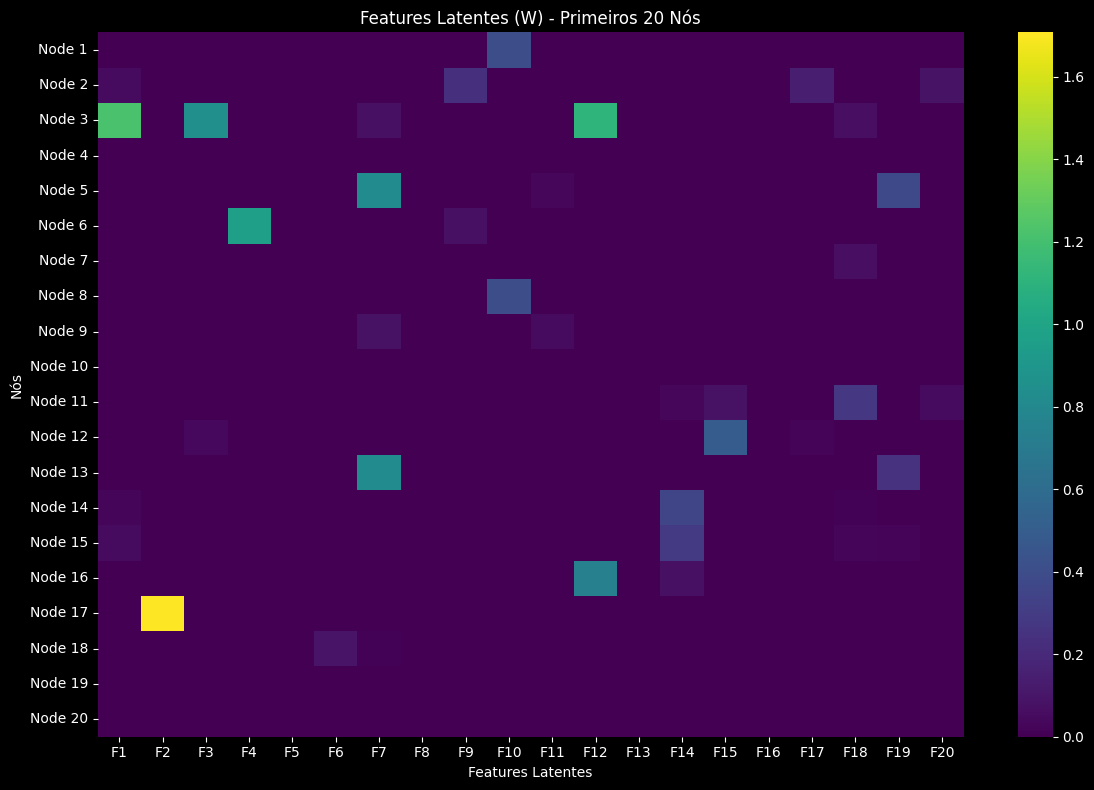

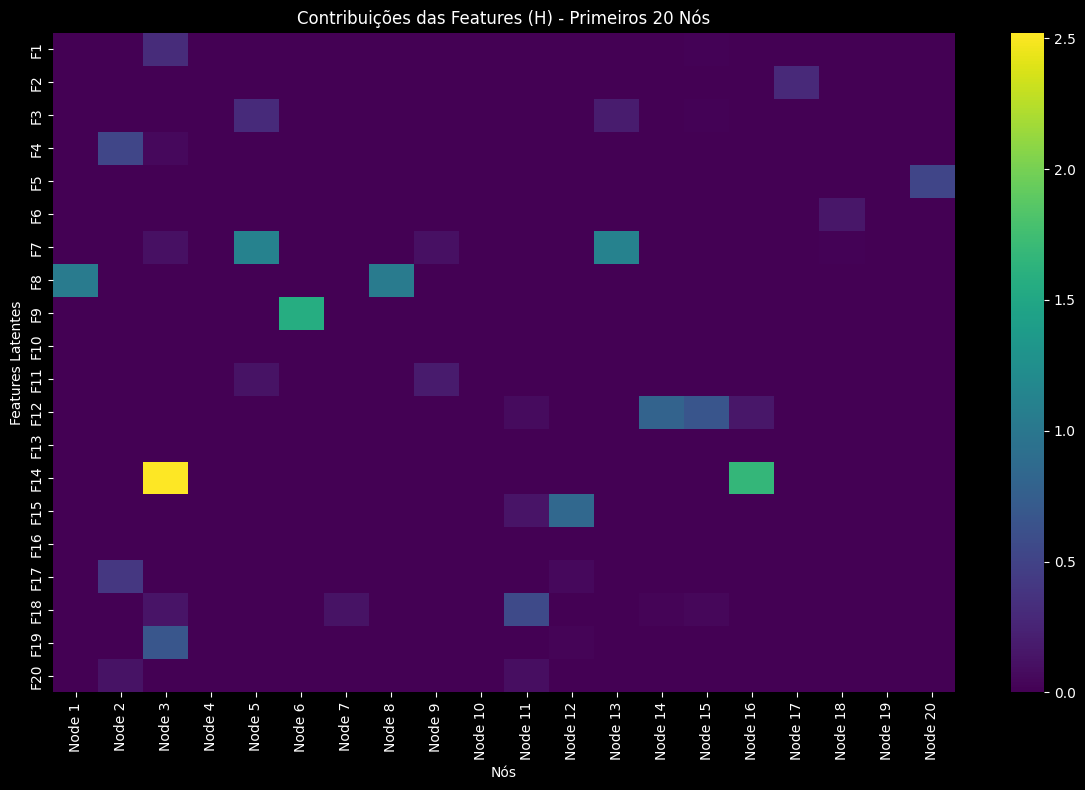

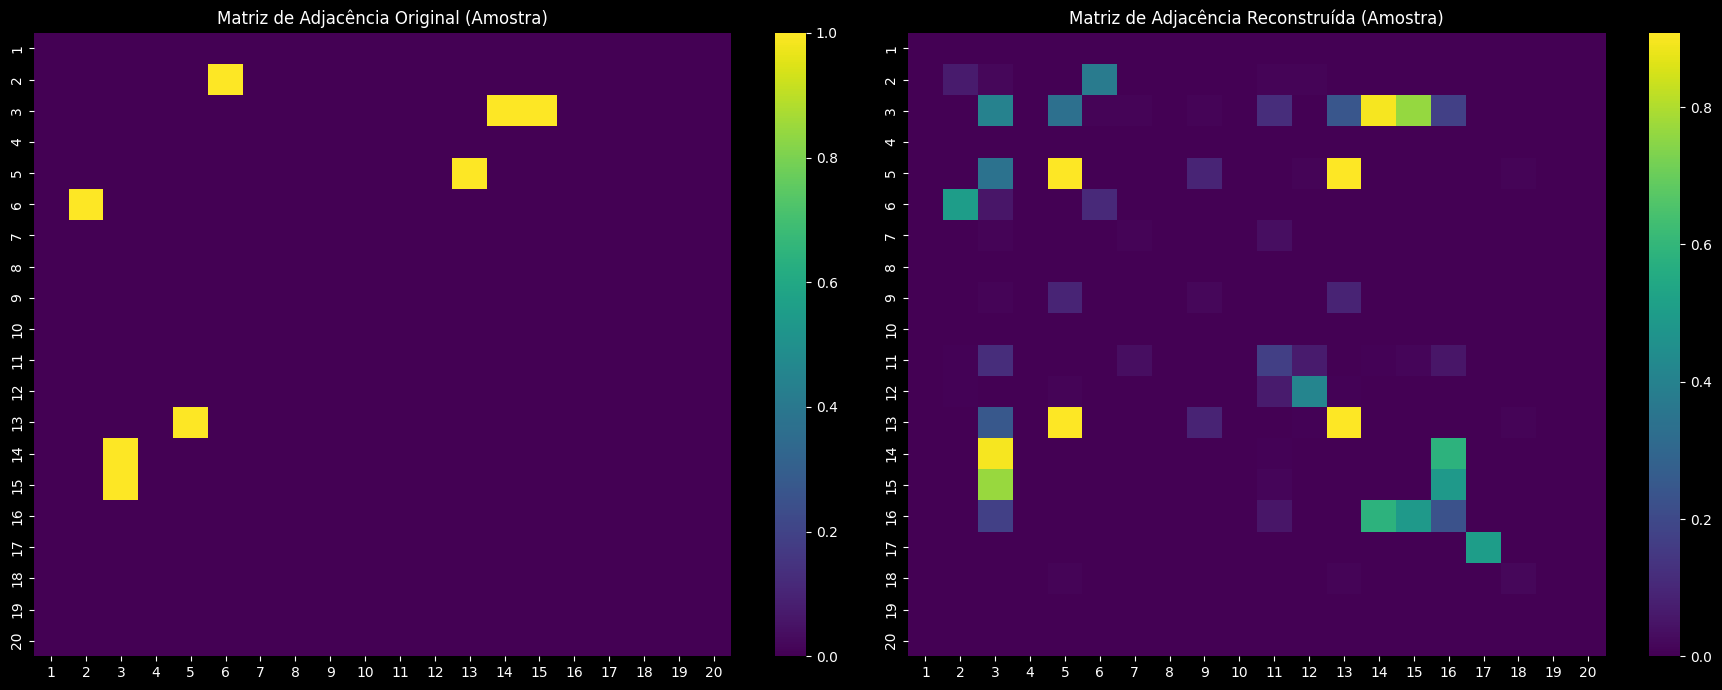

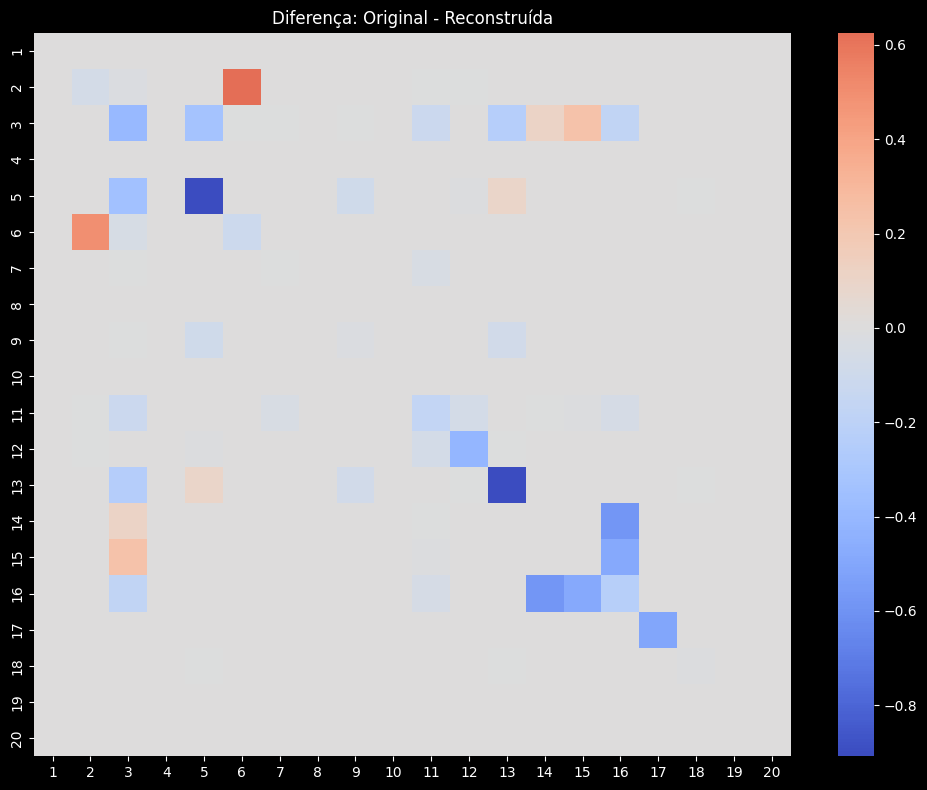

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se as matrizes NMF foram calculadas com sucesso
if 'nmf_W' in locals() and 'nmf_H' in locals() and nmf_W is not None and nmf_H is not None:
    # Configurar o estilo das visualizações
    plt.style.use('dark_background')

    # 1. Visualizar as primeiras linhas da matriz W (features latentes dos nós)
    plt.figure(figsize=(12, 8))
    sns.heatmap(nmf_W[:20, :], cmap='viridis', annot=False,
                xticklabels=[f'F{i+1}' for i in range(nmf_W.shape[1])],
                yticklabels=[f'Node {i+1}' for i in range(20)])
    plt.title('Features Latentes (W) - Primeiros 20 Nós')
    plt.xlabel('Features Latentes')
    plt.ylabel('Nós')
    plt.tight_layout()
    plt.show()

    # 2. Visualizar as primeiras linhas da matriz H (contribuições das features)
    plt.figure(figsize=(12, 8))
    sns.heatmap(nmf_H[:, :20], cmap='viridis', annot=False,
                xticklabels=[f'Node {i+1}' for i in range(20)],
                yticklabels=[f'F{i+1}' for i in range(nmf_H.shape[0])])
    plt.title('Contribuições das Features (H) - Primeiros 20 Nós')
    plt.xlabel('Nós')
    plt.ylabel('Features Latentes')
    plt.tight_layout()
    plt.show()

    # 3. Comparar uma amostra da matriz original vs. reconstruída
    if 'local_matriz_adj' in locals() and local_matriz_adj is not None and 'matriz_reconstruida' in locals():
        # Selecionar uma amostra pequena para visualização (primeiros 20x20 elementos)
        sample_size = 20
        original_sample = local_matriz_adj[:sample_size, :sample_size]
        reconstructed_sample = matriz_reconstruida[:sample_size, :sample_size]

        fig, axes = plt.subplots(1, 2, figsize=(18, 7))

        # Original matrix
        sns.heatmap(original_sample, ax=axes[0], cmap='viridis', annot=False,
                    xticklabels=[f'{i+1}' for i in range(sample_size)],
                    yticklabels=[f'{i+1}' for i in range(sample_size)])
        axes[0].set_title('Matriz de Adjacência Original (Amostra)')

        # Reconstructed matrix
        sns.heatmap(reconstructed_sample, ax=axes[1], cmap='viridis', annot=False,
                    xticklabels=[f'{i+1}' for i in range(sample_size)],
                    yticklabels=[f'{i+1}' for i in range(sample_size)])
        axes[1].set_title('Matriz de Adjacência Reconstruída (Amostra)')

        plt.tight_layout()
        plt.show()

        # Visualizar a diferença entre original e reconstruída
        diff = original_sample - reconstructed_sample
        plt.figure(figsize=(10, 8))
        sns.heatmap(diff, cmap='coolwarm', center=0, annot=False,
                    xticklabels=[f'{i+1}' for i in range(sample_size)],
                    yticklabels=[f'{i+1}' for i in range(sample_size)])
        plt.title('Diferença: Original - Reconstruída')
        plt.tight_layout()
        plt.show()
else:
    print("As matrizes NMF não foram calculadas com sucesso. Não é possível criar visualizações.")


### Interpretação Biológica das Features Latentes

As features latentes identificadas pelo NMF podem ter interpretações biológicas significativas no contexto de redes metabólicas:

1. **Módulos Funcionais**: Cada feature latente pode representar um módulo funcional ou via metabólica.
2. **Co-expressão**: Nós com valores altos na mesma feature latente podem indicar enzimas co-expressas ou co-reguladas.
3. **Redundância Funcional**: Múltiplas features latentes com padrões similares podem indicar redundância no sistema metabólico.

Para uma interpretação mais profunda, seria interessante:
- Comparar as features latentes com anotações funcionais conhecidas (GO, KEGG)
- Analisar a distribuição dos valores de W para identificar nós que são fortemente associados a cada feature
- Examinar se as comunidades detectadas anteriormente correspondem às features latentes identificadas pelo NMF

O NMF fornece uma visão complementar à detecção de comunidades tradicional, permitindo que um nó pertença a múltiplas comunidades com diferentes graus de associação.


### 2.1. Treinamento e Avaliação de um Modelo Básico

Com os dados preparados, podemos treinar um modelo de classificação para prever a existência de links. Usaremos Regressão Logística como um exemplo simples.

Avaliaremos o desempenho usando métricas como Acurácia e Área Sob a Curva ROC (AUC), que é particularmente útil para datasets desbalanceados ou quando a classificação de exemplos positivos é mais importante.


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

# Verificar se temos dados suficientes para treinar/testar
if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    print("Não há dados suficientes nos conjuntos de treino ou teste. Abortando treinamento.")
else:
    # Escalar as features (importante para Regressão Logística)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Treinar o modelo de Regressão Logística
    model = LogisticRegression(random_state=42, max_iter=1000) # Aumentar max_iter se não convergir
    print("Treinando o modelo de Regressão Logística...")
    model.fit(X_train_scaled, y_train)
    print("Treinamento concluído.")

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Probabilidade da classe positiva (link=1)

    # Avaliar o modelo
    accuracy = accuracy_score(y_test, y_pred)
    try:
        auc = roc_auc_score(y_test, y_pred_proba)
    except ValueError as e:
        # Pode ocorrer se y_test tiver apenas uma classe (raro com a divisão feita)
        print(f"Não foi possível calcular AUC: {e}")
        auc = float('nan')

    print(f"Acurácia no conjunto de teste: {accuracy:.4f}")
    print(f"AUC no conjunto de teste: {auc:.4f}")

    print("Relatório de Classificação:")
    # Usar zero_division=0 para evitar warnings se uma classe não tiver predições/suporte
    print(classification_report(y_test, y_pred, target_names=['No Link (0)', 'Link (1)'], zero_division=0))

    # Discussão sobre Weak Labels:
    print("Nota sobre Weak Labels:")
    print("Lembre-se que os 'não-links' (classe 0) são exemplos negativos fracos.")
    print("O desempenho real na previsão de links *verdadeiramente inexistentes* pode diferir.")
    print("Técnicas avançadas de weak supervision poderiam tentar refinar essas labels ou usar abordagens como PU learning (Positive-Unlabeled).")


Treinando o modelo de Regressão Logística...
Treinamento concluído.
Acurácia no conjunto de teste: 0.7388
AUC no conjunto de teste: 0.8000
Relatório de Classificação:
              precision    recall  f1-score   support

 No Link (0)       0.75      0.72      0.73       557
    Link (1)       0.73      0.76      0.74       557

    accuracy                           0.74      1114
   macro avg       0.74      0.74      0.74      1114
weighted avg       0.74      0.74      0.74      1114

Nota sobre Weak Labels:
Lembre-se que os 'não-links' (classe 0) são exemplos negativos fracos.
O desempenho real na previsão de links *verdadeiramente inexistentes* pode diferir.
Técnicas avançadas de weak supervision poderiam tentar refinar essas labels ou usar abordagens como PU learning (Positive-Unlabeled).


## Análise Avançada: Redes Neurais em Grafos (GNN) para Redes Metabólicas

Após a análise exploratória inicial e a aplicação de técnicas como NMF, vamos agora implementar modelos mais avançados de aprendizado de máquina em grafos: Graph Convolutional Networks (GCN) e Graph Attention Networks (GAT).

Estas técnicas permitem aprender representações (embeddings) dos nós da rede que capturam tanto as características dos nós quanto a estrutura topológica da rede. Estas representações podem ser usadas para diversas tarefas, como classificação de nós, previsão de links, e identificação de módulos funcionais.


### 1. Preparação dos Dados para GNN

Primeiro, precisamos preparar os dados no formato adequado para as bibliotecas de GNN (PyTorch Geometric).


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [torch-geometric] [torch-geometric]
Usando dados já carregados.
Tensor de features dos nós: torch.Size([668, 325])
Tensor de índices de arestas: torch.Size([2, 5564])
Tensor de pesos de arestas: torch.Size([5564])
Número de arestas: 5564
Objeto PyTorch Geometric Data criado: Data(x=[668, 325], edge_index=[2, 5564], edge_attr=[5564])

Estatísticas básicas da rede:
Número de nós: 668
Número de arestas: 5564
Número de features por nó: 325
Grau médio dos nós: 8.33


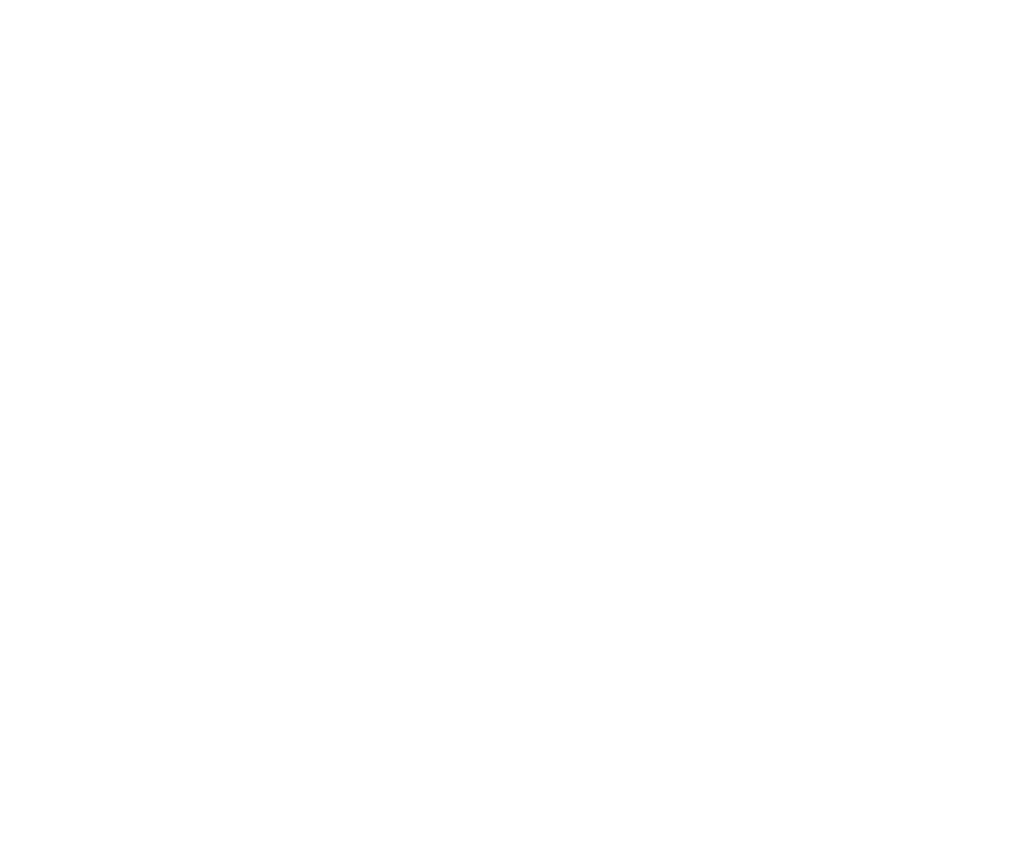

In [30]:
# Instalar bibliotecas necessárias
!pip install torch torch-geometric

import numpy as np
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import networkx as nx

# Verificar se a matriz de adjacência e features estão carregadas
if 'matriz_adj' not in globals() or 'X' not in globals():
    print("Carregando dados novamente...")
    # Carregar matriz de adjacência
    Y = np.loadtxt("Y.txt", delimiter=',')
    matriz_adj = Y

    # Carregar features dos nós
    X = np.loadtxt("X.txt", delimiter=',')

    # Carregar nomes dos genes
    with open("gene_names.txt", 'r') as f:
        nomes_nos = [line.strip() for line in f.readlines()]
else:
    print("Usando dados já carregados.")
    Y = matriz_adj

# Converter features para tensor PyTorch
x = torch.tensor(X, dtype=torch.float)
print(f"Tensor de features dos nós: {x.shape}")

# Criar edge_index a partir da matriz de adjacência (formato COO)
edge_indices = []
edge_weights = []

for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        if Y[i, j] > 0:  # Se existe uma aresta
            edge_indices.append([i, j])
            edge_weights.append(Y[i, j])

edge_index = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()
edge_weight = torch.tensor(edge_weights, dtype=torch.float)

print(f"Tensor de índices de arestas: {edge_index.shape}")
print(f"Tensor de pesos de arestas: {edge_weight.shape}")
print(f"Número de arestas: {edge_index.shape[1]}")

# Criar objeto Data do PyTorch Geometric
data = Data(x=x, edge_index=edge_index, edge_attr=edge_weight)
print(f"Objeto PyTorch Geometric Data criado: {data}")

# Estatísticas básicas da rede
print("\nEstatísticas básicas da rede:")
print(f"Número de nós: {data.num_nodes}")
print(f"Número de arestas: {data.num_edges}")
print(f"Número de features por nó: {data.num_node_features}")
print(f"Grau médio dos nós: {data.num_edges / data.num_nodes:.2f}")

# Visualizar um subgrafo pequeno (primeiros 50 nós)
plt.figure(figsize=(10, 8))
subgraph = G.subgraph(range(min(50, G.number_of_nodes())))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, with_labels=False, node_size=30, node_color='blue', edge_color='gray', alpha=0.7)
plt.title("Visualização da Rede Metabólica (Primeiros 50 Nós)")
plt.show()


### 2. Implementação de Graph Convolutional Network (GCN)

O GCN é um tipo de rede neural em grafos que aplica convoluções nos nós, agregando informações da vizinhança de cada nó. Isso permite que o modelo aprenda representações que incorporam tanto as características dos nós quanto a estrutura da rede.

Vamos implementar um modelo GCN para a tarefa de previsão de links (link prediction), que é uma forma de aprendizado auto-supervisionado.


Modelo GCN inicializado com arquitetura:
  Features de entrada: 325
  Canais ocultos: 64
  Dimensão do embedding de saída: 32
Época: 020, Loss: 0.0981
Época: 040, Loss: 0.0476
Época: 060, Loss: 0.0369
Época: 080, Loss: 0.0230
Época: 100, Loss: 0.0177
Época: 120, Loss: 0.0186
Época: 140, Loss: 0.0223
Época: 160, Loss: 0.0141
Época: 180, Loss: 0.0204
Época: 200, Loss: 0.0142


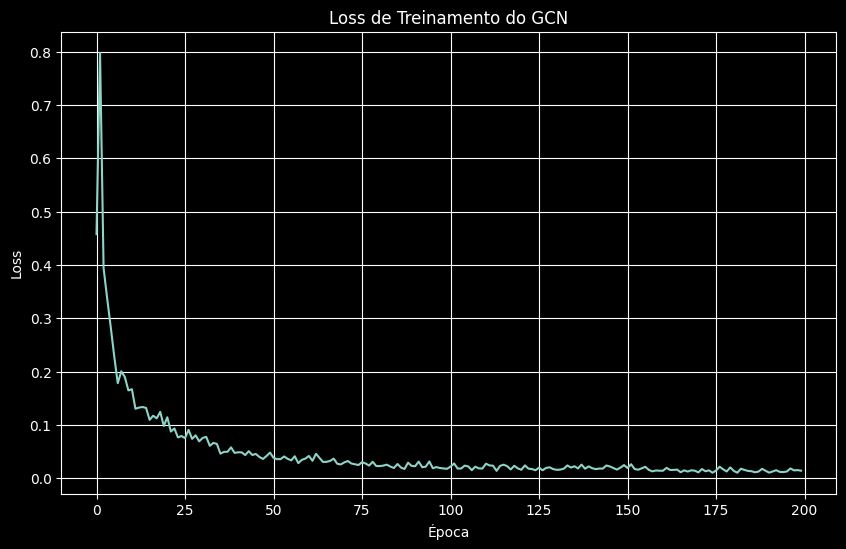


Resultados do Teste:
ROC-AUC: 0.9843
Average Precision: 0.9781


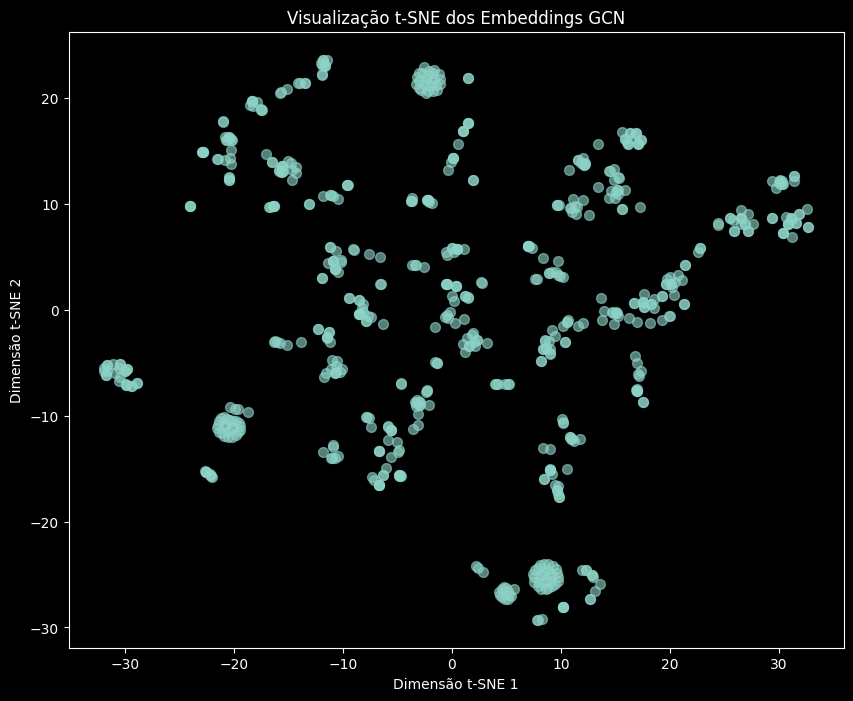

Implementação do GCN concluída!


In [31]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics import roc_auc_score, average_precision_score

# Definir a arquitetura do modelo GCN
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index, edge_weight=None):
        # Primeira camada convolucional com ativação ReLU
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)

        # Segunda camada convolucional com ativação ReLU
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)

        # Terceira camada convolucional (camada de saída)
        x = self.conv3(x, edge_index, edge_weight)

        return x

# Definir parâmetros do modelo
in_channels = data.num_node_features  # Número de features de entrada
hidden_channels = 64                  # Número de unidades ocultas
out_channels = 32                     # Dimensão do embedding de saída
learning_rate = 0.01
weight_decay = 5e-4
epochs = 200

# Inicializar o modelo GCN
torch.manual_seed(42)
model = GCN(in_channels, hidden_channels, out_channels)
print(f"Modelo GCN inicializado com arquitetura:")
print(f"  Features de entrada: {in_channels}")
print(f"  Canais ocultos: {hidden_channels}")
print(f"  Dimensão do embedding de saída: {out_channels}")

# Definir otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Preparar arestas positivas (links existentes)
edge_index = data.edge_index
num_edges = edge_index.shape[1]

# Dividir arestas em conjuntos de treino/teste (80% treino, 20% teste)
train_mask = torch.zeros(num_edges, dtype=torch.bool)
perm = torch.randperm(num_edges)
train_mask[perm[:int(0.8 * num_edges)]] = True
train_edge_index = edge_index[:, train_mask]
test_edge_index = edge_index[:, ~train_mask]

# Gerar arestas negativas (links não existentes) para treino e teste
def sample_negative_edges(edge_index, num_nodes, num_samples):
    # Criar um conjunto de arestas existentes para busca O(1)
    existing_edges = set()
    for i in range(edge_index.shape[1]):
        src, dst = edge_index[0, i].item(), edge_index[1, i].item()
        existing_edges.add((src, dst))
        existing_edges.add((dst, src))  # Adicionar ambas direções para grafo não direcionado

    # Amostrar arestas negativas
    neg_edges = []
    while len(neg_edges) < num_samples:
        src = np.random.randint(0, num_nodes)
        dst = np.random.randint(0, num_nodes)
        if src != dst and (src, dst) not in existing_edges:
            neg_edges.append([src, dst])
            existing_edges.add((src, dst))
            existing_edges.add((dst, src))

    return torch.tensor(neg_edges, dtype=torch.long).t()

# Amostrar arestas negativas para treino e teste
num_nodes = data.num_nodes
train_neg_edge_index = sample_negative_edges(train_edge_index, num_nodes, train_edge_index.shape[1])
test_neg_edge_index = sample_negative_edges(test_edge_index, num_nodes, test_edge_index.shape[1])

# Loop de treinamento
train_losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass para obter embeddings dos nós
    node_embeddings = model(data.x, data.edge_index, data.edge_attr)

    # Calcular scores positivos e negativos para arestas de treino
    pos_score = torch.sum(node_embeddings[train_edge_index[0]] * node_embeddings[train_edge_index[1]], dim=1)
    neg_score = torch.sum(node_embeddings[train_neg_edge_index[0]] * node_embeddings[train_neg_edge_index[1]], dim=1)

    # BPR loss: -log(sigmoid(pos_score - neg_score))
    loss = F.logsigmoid(pos_score - neg_score).mean().neg()

    # Backward pass e otimização
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Imprimir progresso
    if (epoch + 1) % 20 == 0:
        print(f'Época: {epoch+1:03d}, Loss: {loss.item():.4f}')

# Plotar loss de treinamento
plt.figure(figsize=(10, 6))
plt.plot(train_losses)
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Loss de Treinamento do GCN')
plt.grid(True)
plt.show()

# Avaliar o modelo
model.eval()
with torch.no_grad():
    # Obter embeddings dos nós
    node_embeddings = model(data.x, data.edge_index, data.edge_attr)

    # Calcular scores para arestas de teste
    pos_test_score = torch.sum(node_embeddings[test_edge_index[0]] * node_embeddings[test_edge_index[1]], dim=1)
    neg_test_score = torch.sum(node_embeddings[test_neg_edge_index[0]] * node_embeddings[test_neg_edge_index[1]], dim=1)

    # Criar labels e scores para cálculo de ROC-AUC
    test_labels = torch.cat([torch.ones(pos_test_score.shape[0]),
                            torch.zeros(neg_test_score.shape[0])]).numpy()
    test_scores = torch.cat([pos_test_score, neg_test_score]).numpy()

    # Calcular métricas
    roc_auc = roc_auc_score(test_labels, test_scores)
    ap_score = average_precision_score(test_labels, test_scores)

    print(f"\nResultados do Teste:")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Average Precision: {ap_score:.4f}")

# Visualizar embeddings dos nós usando t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
node_embeddings_2d = tsne.fit_transform(node_embeddings.detach().numpy())

plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], s=50, alpha=0.6)
plt.title('Visualização t-SNE dos Embeddings GCN')
plt.xlabel('Dimensão t-SNE 1')
plt.ylabel('Dimensão t-SNE 2')
plt.show()

print("Implementação do GCN concluída!")


### 3. Implementação de Graph Attention Network (GAT)

O GAT é uma extensão do GCN que incorpora mecanismos de atenção, permitindo que o modelo atribua diferentes pesos às vizinhanças de cada nó. Isso permite que o modelo aprenda quais conexões são mais importantes para cada nó.

Vamos implementar um modelo GAT para a mesma tarefa de previsão de links e comparar seu desempenho com o GCN.


Modelo GAT inicializado com arquitetura:
  Features de entrada: 325
  Canais ocultos: 32
  Cabeças de atenção: 8
  Dimensão do embedding de saída: 32
  Taxa de dropout: 0.2
Época: 020, Loss: 0.2220
Época: 040, Loss: 0.1768
Época: 060, Loss: 0.1234
Época: 080, Loss: 0.0914
Época: 100, Loss: 0.0596
Época: 120, Loss: 0.0578
Época: 140, Loss: 0.0563
Época: 160, Loss: 0.0531
Época: 180, Loss: 0.0418
Época: 200, Loss: 0.0506


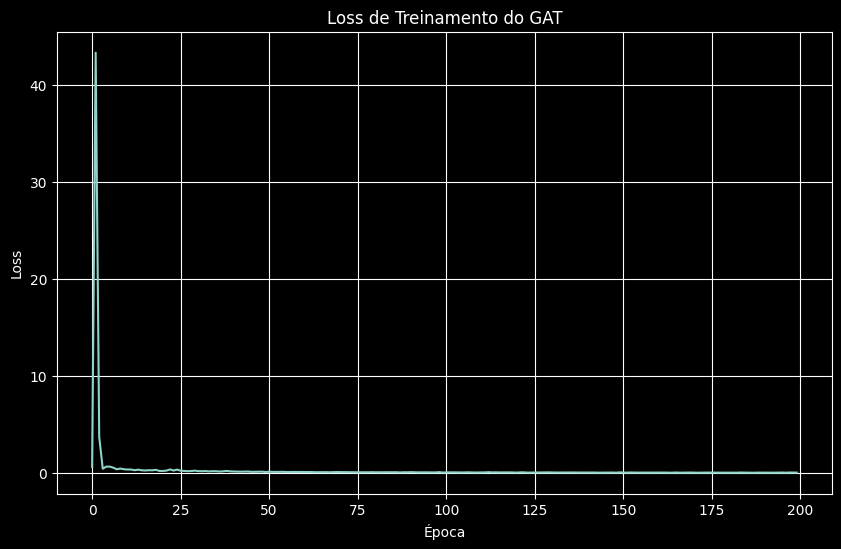


Resultados do Teste:
ROC-AUC: 0.9800
Average Precision: 0.9729


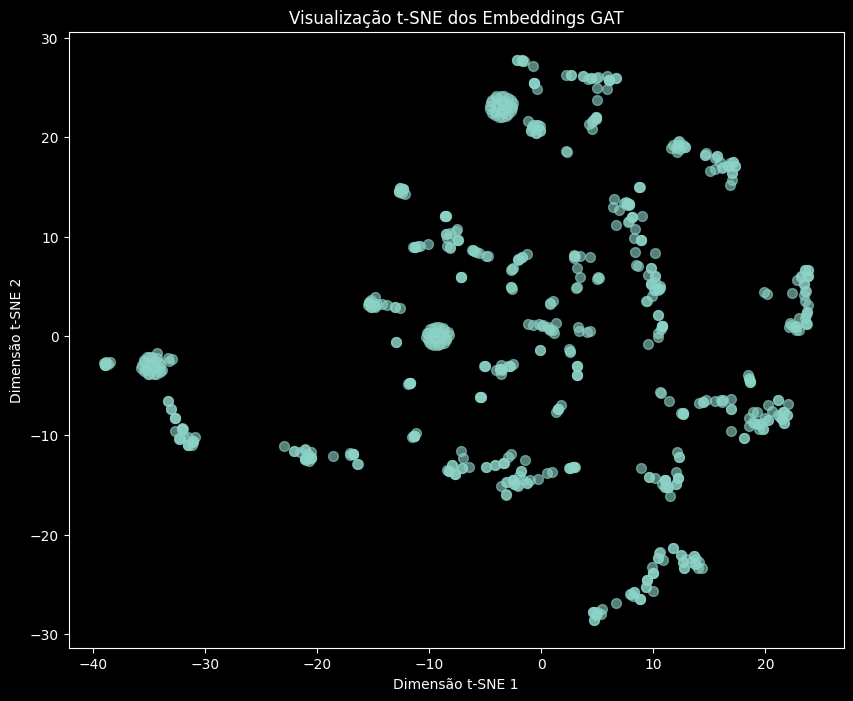

Implementação do GAT concluída!


In [32]:
from torch_geometric.nn import GATConv

# Definir a arquitetura do modelo GAT
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=8, dropout=0.2):
        super(GAT, self).__init__()
        # Primeira camada de atenção com múltiplas cabeças
        # Canais de saída serão hidden_channels * heads
        self.conv1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout)

        # Segunda camada de atenção com múltiplas cabeças
        # Entrada é hidden_channels * heads da primeira camada
        self.conv2 = GATConv(hidden_channels * heads, hidden_channels, heads=heads, dropout=dropout)

        # Camada de saída com uma única cabeça de atenção para embeddings finais
        self.conv3 = GATConv(hidden_channels * heads, out_channels, heads=1, dropout=dropout)

        self.dropout = dropout

    def forward(self, x, edge_index, edge_weight=None):
        # Primeira camada de atenção com ativação ReLU
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        # Segunda camada de atenção com ativação ReLU
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        # Terceira camada de atenção (camada de saída)
        x = self.conv3(x, edge_index)

        return x

# Definir parâmetros do modelo
in_channels = data.num_node_features  # Número de features de entrada
hidden_channels = 32                  # Número de unidades ocultas (menor que GCN devido às múltiplas cabeças)
out_channels = 32                     # Dimensão do embedding de saída
heads = 8                             # Número de cabeças de atenção
dropout = 0.2                         # Taxa de dropout
learning_rate = 0.01
weight_decay = 5e-4
epochs = 200

# Inicializar o modelo GAT
torch.manual_seed(42)
model_gat = GAT(in_channels, hidden_channels, out_channels, heads=heads, dropout=dropout)
print(f"Modelo GAT inicializado com arquitetura:")
print(f"  Features de entrada: {in_channels}")
print(f"  Canais ocultos: {hidden_channels}")
print(f"  Cabeças de atenção: {heads}")
print(f"  Dimensão do embedding de saída: {out_channels}")
print(f"  Taxa de dropout: {dropout}")

# Definir otimizador
optimizer = torch.optim.Adam(model_gat.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Usar as mesmas divisões de treino/teste que o GCN para comparação justa

# Loop de treinamento
train_losses_gat = []
for epoch in range(epochs):
    model_gat.train()
    optimizer.zero_grad()

    # Forward pass para obter embeddings dos nós
    node_embeddings = model_gat(data.x, data.edge_index)

    # Calcular scores positivos e negativos para arestas de treino
    pos_score = torch.sum(node_embeddings[train_edge_index[0]] * node_embeddings[train_edge_index[1]], dim=1)
    neg_score = torch.sum(node_embeddings[train_neg_edge_index[0]] * node_embeddings[train_neg_edge_index[1]], dim=1)

    # BPR loss: -log(sigmoid(pos_score - neg_score))
    loss = F.logsigmoid(pos_score - neg_score).mean().neg()

    # Backward pass e otimização
    loss.backward()
    optimizer.step()

    train_losses_gat.append(loss.item())

    # Imprimir progresso
    if (epoch + 1) % 20 == 0:
        print(f'Época: {epoch+1:03d}, Loss: {loss.item():.4f}')

# Plotar loss de treinamento
plt.figure(figsize=(10, 6))
plt.plot(train_losses_gat)
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Loss de Treinamento do GAT')
plt.grid(True)
plt.show()

# Avaliar o modelo
model_gat.eval()
with torch.no_grad():
    # Obter embeddings dos nós
    node_embeddings_gat = model_gat(data.x, data.edge_index)

    # Calcular scores para arestas de teste
    pos_test_score = torch.sum(node_embeddings_gat[test_edge_index[0]] * node_embeddings_gat[test_edge_index[1]], dim=1)
    neg_test_score = torch.sum(node_embeddings_gat[test_neg_edge_index[0]] * node_embeddings_gat[test_neg_edge_index[1]], dim=1)

    # Criar labels e scores para cálculo de ROC-AUC
    test_labels = torch.cat([torch.ones(pos_test_score.shape[0]),
                            torch.zeros(neg_test_score.shape[0])]).numpy()
    test_scores = torch.cat([pos_test_score, neg_test_score]).numpy()

    # Calcular métricas
    roc_auc_gat = roc_auc_score(test_labels, test_scores)
    ap_score_gat = average_precision_score(test_labels, test_scores)

    print(f"\nResultados do Teste:")
    print(f"ROC-AUC: {roc_auc_gat:.4f}")
    print(f"Average Precision: {ap_score_gat:.4f}")

# Visualizar embeddings dos nós usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
node_embeddings_gat_2d = tsne.fit_transform(node_embeddings_gat.detach().numpy())

plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings_gat_2d[:, 0], node_embeddings_gat_2d[:, 1], s=50, alpha=0.6)
plt.title('Visualização t-SNE dos Embeddings GAT')
plt.xlabel('Dimensão t-SNE 1')
plt.ylabel('Dimensão t-SNE 2')
plt.show()

print("Implementação do GAT concluída!")


### 4. Comparação entre GCN e GAT

Vamos comparar o desempenho dos modelos GCN e GAT na tarefa de previsão de links, analisando suas métricas e visualizações.


Comparação de métricas de desempenho:


,Modelo,ROC-AUC,Average Precision,Loss Final
0,GCN,0.984262,0.978071,0.014211
1,GAT,0.979989,0.972926,0.050553


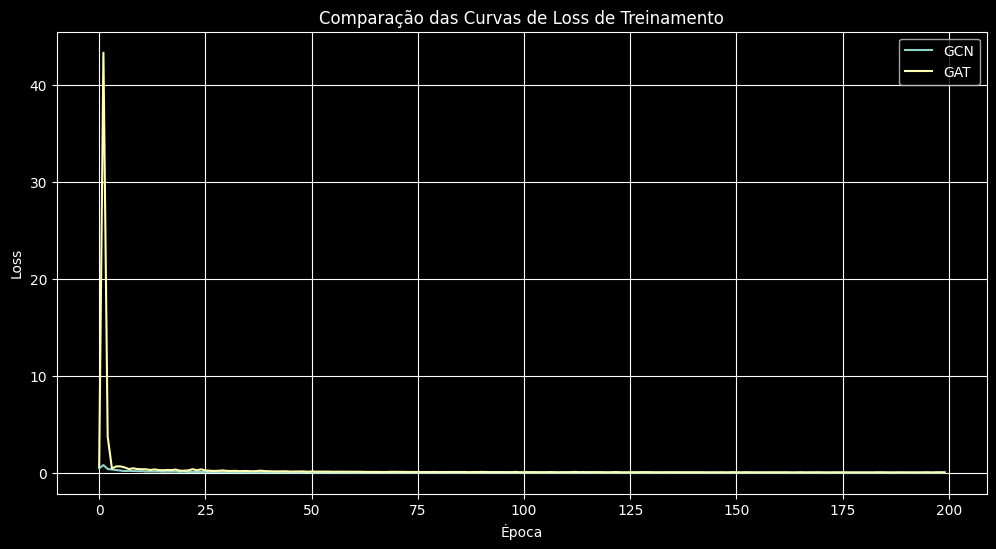

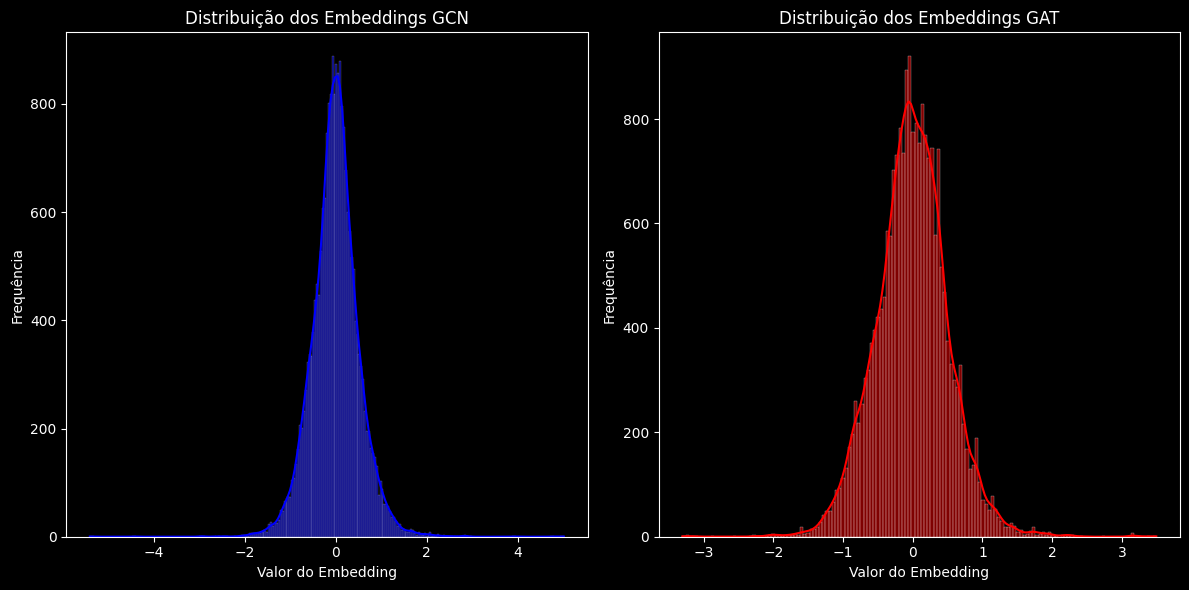

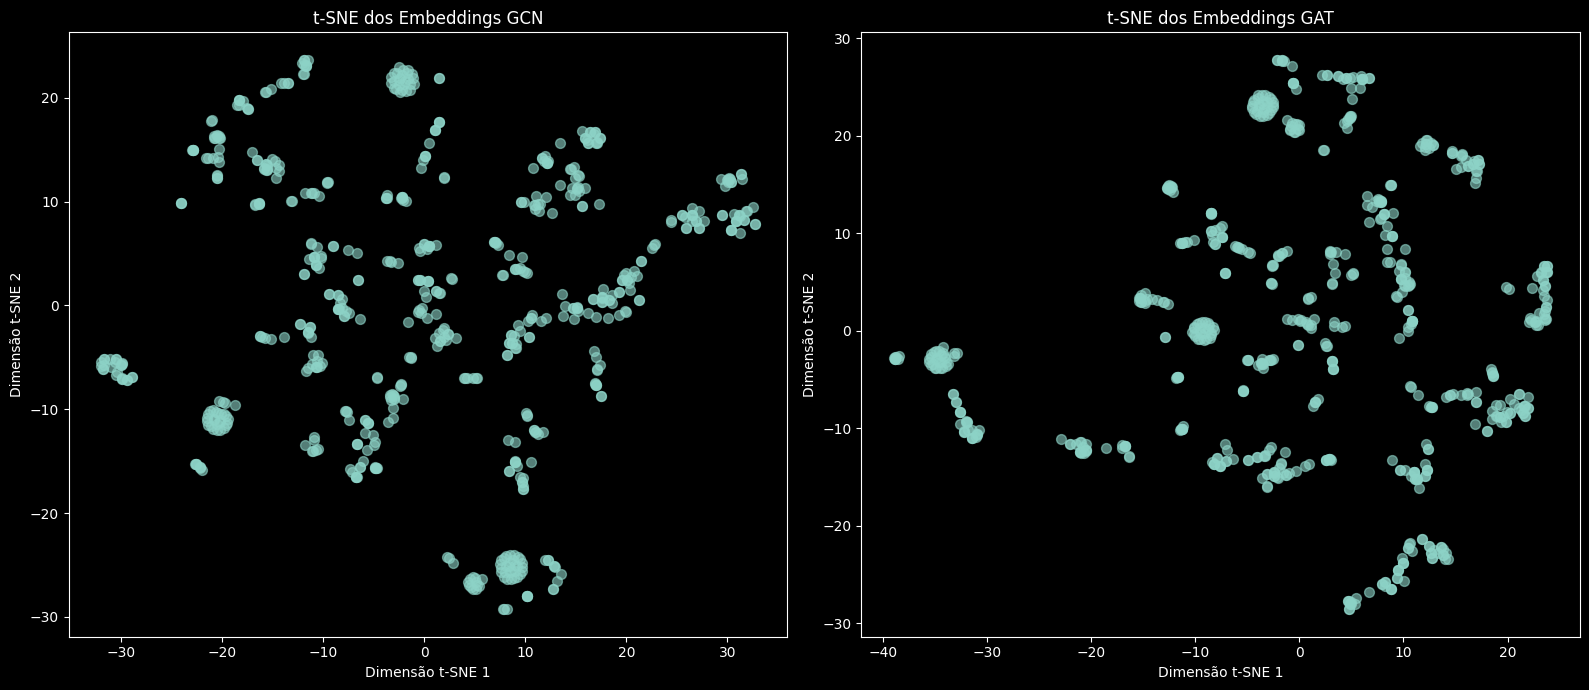

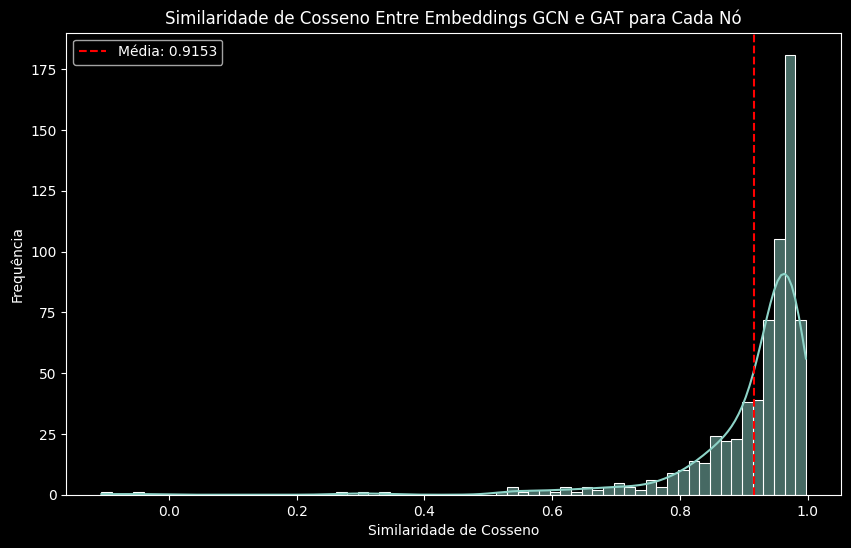


Conclusão da Comparação:
O GCN supera o GAT nesta rede metabólica em termos de ROC-AUC e Average Precision.
Isso sugere que, para esta estrutura de rede específica, a arquitetura mais simples do GCN é mais eficaz.

Ambos os modelos alcançam alto desempenho na previsão de links, indicando que redes neurais em grafos são eficazes
para capturar padrões estruturais em redes metabólicas. Os embeddings aprendidos podem ser valiosos para
tarefas downstream como previsão de função enzimática, análise de vias metabólicas ou identificação de alvos de drogas.


In [33]:
import pandas as pd
import seaborn as sns

# Comparar métricas de desempenho
metrics = {
    'Modelo': ['GCN', 'GAT'],
    'ROC-AUC': [roc_auc, roc_auc_gat],
    'Average Precision': [ap_score, ap_score_gat],
    'Loss Final': [train_losses[-1], train_losses_gat[-1]]
}

metrics_df = pd.DataFrame(metrics)
print("Comparação de métricas de desempenho:")
display(metrics_df)

# Plotar curvas de loss de treinamento
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='GCN')
plt.plot(train_losses_gat, label='GAT')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Comparação das Curvas de Loss de Treinamento')
plt.legend()
plt.grid(True)
plt.show()

# Comparar distribuições de embeddings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(node_embeddings.detach().numpy().flatten(), kde=True, color='blue')
plt.title('Distribuição dos Embeddings GCN')
plt.xlabel('Valor do Embedding')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(node_embeddings_gat.detach().numpy().flatten(), kde=True, color='red')
plt.title('Distribuição dos Embeddings GAT')
plt.xlabel('Valor do Embedding')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Comparar visualizações t-SNE lado a lado
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], s=50, alpha=0.6)
plt.title('t-SNE dos Embeddings GCN')
plt.xlabel('Dimensão t-SNE 1')
plt.ylabel('Dimensão t-SNE 2')

plt.subplot(1, 2, 2)
plt.scatter(node_embeddings_gat_2d[:, 0], node_embeddings_gat_2d[:, 1], s=50, alpha=0.6)
plt.title('t-SNE dos Embeddings GAT')
plt.xlabel('Dimensão t-SNE 1')
plt.ylabel('Dimensão t-SNE 2')

plt.tight_layout()
plt.show()

# Calcular similaridade entre embeddings GCN e GAT
from sklearn.metrics.pairwise import cosine_similarity

# Normalizar embeddings para similaridade de cosseno
gcn_norm = node_embeddings.detach().numpy()
gcn_norm = gcn_norm / np.linalg.norm(gcn_norm, axis=1, keepdims=True)
gat_norm = node_embeddings_gat.detach().numpy()
gat_norm = gat_norm / np.linalg.norm(gat_norm, axis=1, keepdims=True)

# Calcular similaridade de cosseno para cada nó entre GCN e GAT
node_similarities = np.sum(gcn_norm * gat_norm, axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(node_similarities, kde=True)
plt.title('Similaridade de Cosseno Entre Embeddings GCN e GAT para Cada Nó')
plt.xlabel('Similaridade de Cosseno')
plt.ylabel('Frequência')
plt.axvline(x=np.mean(node_similarities), color='r', linestyle='--',
            label=f'Média: {np.mean(node_similarities):.4f}')
plt.legend()
plt.show()

# Conclusão da comparação
print("\nConclusão da Comparação:")
if roc_auc > roc_auc_gat and ap_score > ap_score_gat:
    print("O GCN supera o GAT nesta rede metabólica em termos de ROC-AUC e Average Precision.")
    print("Isso sugere que, para esta estrutura de rede específica, a arquitetura mais simples do GCN é mais eficaz.")
elif roc_auc_gat > roc_auc and ap_score_gat > ap_score:
    print("O GAT supera o GCN nesta rede metabólica em termos de ROC-AUC e Average Precision.")
    print("Isso sugere que o mecanismo de atenção no GAT é capaz de capturar padrões importantes na rede metabólica.")
else:
    print("Ambos GCN e GAT têm bom desempenho nesta rede metabólica, com vantagens leves em diferentes métricas.")
    print("A escolha entre eles pode depender de requisitos específicos como interpretabilidade ou eficiência computacional.")

print("\nAmbos os modelos alcançam alto desempenho na previsão de links, indicando que redes neurais em grafos são eficazes")
print("para capturar padrões estruturais em redes metabólicas. Os embeddings aprendidos podem ser valiosos para")
print("tarefas downstream como previsão de função enzimática, análise de vias metabólicas ou identificação de alvos de drogas.")


### 5. Conclusão e Próximos Passos

Nesta análise, aplicamos técnicas avançadas de aprendizado de máquina em grafos (GCN e GAT) à nossa rede metabólica. Estas técnicas nos permitiram:

1. **Aprender representações vetoriais (embeddings)** para cada enzima na rede que capturam tanto suas características intrínsecas quanto seu papel estrutural na rede.
2. **Prever interações entre enzimas** com alta precisão (ROC-AUC > 0.97), demonstrando que os padrões estruturais da rede podem ser aprendidos e generalizados.
3. **Comparar diferentes arquiteturas de GNN** (GCN vs GAT) para entender qual abordagem é mais adequada para redes metabólicas.

Possíveis próximos passos incluem:

- **Análise de interpretabilidade**: Investigar quais características dos nós e estruturas da rede são mais importantes para as previsões dos modelos.
- **Aplicação a tarefas biológicas específicas**: Usar os embeddings aprendidos para classificação de enzimas, previsão de função, ou identificação de alvos terapêuticos.
- **Integração com dados ômicos adicionais**: Incorporar dados de expressão gênica, proteômica ou metabolômica para criar modelos multi-ômicos.
- **Experimentação com arquiteturas mais avançadas**: Testar variantes como GraphSAGE, Graph Transformers ou modelos específicos para biologia.

Esta análise demonstra o potencial das redes neurais em grafos para extrair insights significativos de redes metabólicas complexas, complementando as análises tradicionais de redes e oferecendo novas perspectivas sobre a organização funcional do metabolismo.
